In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import numpy.linalg as lg
import networkx as nx
#from networkx.algorithms import community
import warnings
warnings.filterwarnings("ignore")

print(pd.__version__)

Populating the interactive namespace from numpy and matplotlib
1.0.3


In [2]:
dataNW=pd.read_csv('myowdata.csv')
dataNW.set_index('Date',inplace=True)

This data below is the data of the stocks price of some agents of New York from 04/02/2019 to 04/02/2020

In [3]:
dataNW.head(5)

,AAPL,AMZN,BitcoinUSD,CBOE,Crude_Oil,DowJonesInd,FB,GoldJun,GOOG,IMMU,JNUG,Nasdaq,Netflix,Nikkei225,Russel2000,S&P500,TGTCorp,TSLA,USDJPY,WLL
Date,,,,,,,,,,,,,,,,,,,,
2019-02-04,168.315582,1633.310059,3459.154053,15.730000,54.560001,25239.369141,169.250000,1314.300049,1132.800049,15.15,55.171822,7347.540039,351.339996,20883.769531,1517.540039,2724.870117,69.806366,312.890015,109.438004,30.070000
2019-02-05,171.195389,1658.810059,3466.357422,15.570000,53.660000,25411.519531,171.160004,1314.199951,1145.989990,14.97,56.613247,7402.080078,355.809998,20844.449219,1520.229980,2737.699951,70.124359,321.350006,109.960999,28.750000
2019-02-06,171.254364,1640.260010,3413.767822,15.380000,54.009998,25390.300781,170.490005,1309.500000,1115.229980,14.78,53.133942,7375.279785,352.190002,20874.060547,1518.020020,2731.610107,69.873817,317.220001,109.941002,28.799999
2019-02-07,168.010910,1614.369995,3399.471680,16.370001,52.639999,25169.529297,166.380005,1309.400024,1098.709961,14.35,50.698429,7288.350098,344.709991,20751.279297,1505.630005,2706.050049,69.247444,307.510010,109.973999,26.950001
2019-02-08,168.208328,1588.219971,3666.780273,15.720000,52.720001,25106.330078,167.330002,1313.699951,1095.060059,14.04,54.078327,7298.200195,347.570007,20333.169922,1506.390015,2707.879883,68.303070,305.799988,109.755997,26.379999


In [4]:
dataNW.columns

Index(['AAPL', 'AMZN', 'BitcoinUSD', 'CBOE', 'Crude_Oil', 'DowJonesInd', 'FB',
       'GoldJun', 'GOOG', 'IMMU', 'JNUG', 'Nasdaq', 'Netflix', 'Nikkei225',
       'Russel2000', 'S&P500', 'TGTCorp', 'TSLA', 'USDJPY', 'WLL'],
      dtype='object')

In [5]:
labels = {}
for i in range(len(dataNW.columns)):
    labels[i] = dataNW.columns[i]
labels

{0: 'AAPL',
 1: 'AMZN',
 2: 'BitcoinUSD',
 3: 'CBOE',
 4: 'Crude_Oil',
 5: 'DowJonesInd',
 6: 'FB',
 7: 'GoldJun',
 8: 'GOOG',
 9: 'IMMU',
 10: 'JNUG',
 11: 'Nasdaq',
 12: 'Netflix',
 13: 'Nikkei225',
 14: 'Russel2000',
 15: 'S&P500',
 16: 'TGTCorp',
 17: 'TSLA',
 18: 'USDJPY',
 19: 'WLL'}

In [6]:
dataNW.index

Index(['2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
       '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15',
       ...
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17'],
      dtype='object', name='Date', length=242)

# 1-Correlation Matrix

In [7]:
corrMatrix=dataNW.corr()
print(corrMatrix)

                 AAPL      AMZN  BitcoinUSD      CBOE  Crude_Oil  DowJonesInd  \
AAPL         1.000000  0.162203    0.659460 -0.394765  -0.280418     0.929786   
AMZN         0.162203  1.000000    0.107285 -0.242299   0.277154     0.321700   
BitcoinUSD   0.659460  0.107285    1.000000  0.018341  -0.456474     0.600731   
CBOE        -0.394765 -0.242299    0.018341  1.000000   0.144779    -0.574183   
Crude_Oil   -0.280418  0.277154   -0.456474  0.144779   1.000000    -0.350899   
DowJonesInd  0.929786  0.321700    0.600731 -0.574183  -0.350899     1.000000   
FB           0.795483  0.614749    0.569219 -0.360214  -0.170823     0.852630   
GoldJun      0.769064 -0.135355    0.878032 -0.125213  -0.512253     0.688374   
GOOG         0.909761  0.067831    0.489612 -0.458658  -0.189609     0.840598   
IMMU         0.647974 -0.032659    0.104909 -0.568594  -0.140586     0.636032   
JNUG         0.389730  0.009510    0.630393  0.166986  -0.467886     0.400508   
Nasdaq       0.951818  0.401

Get a Visual Representation of the Correlation Matrix using Seaborn and Matplotlib

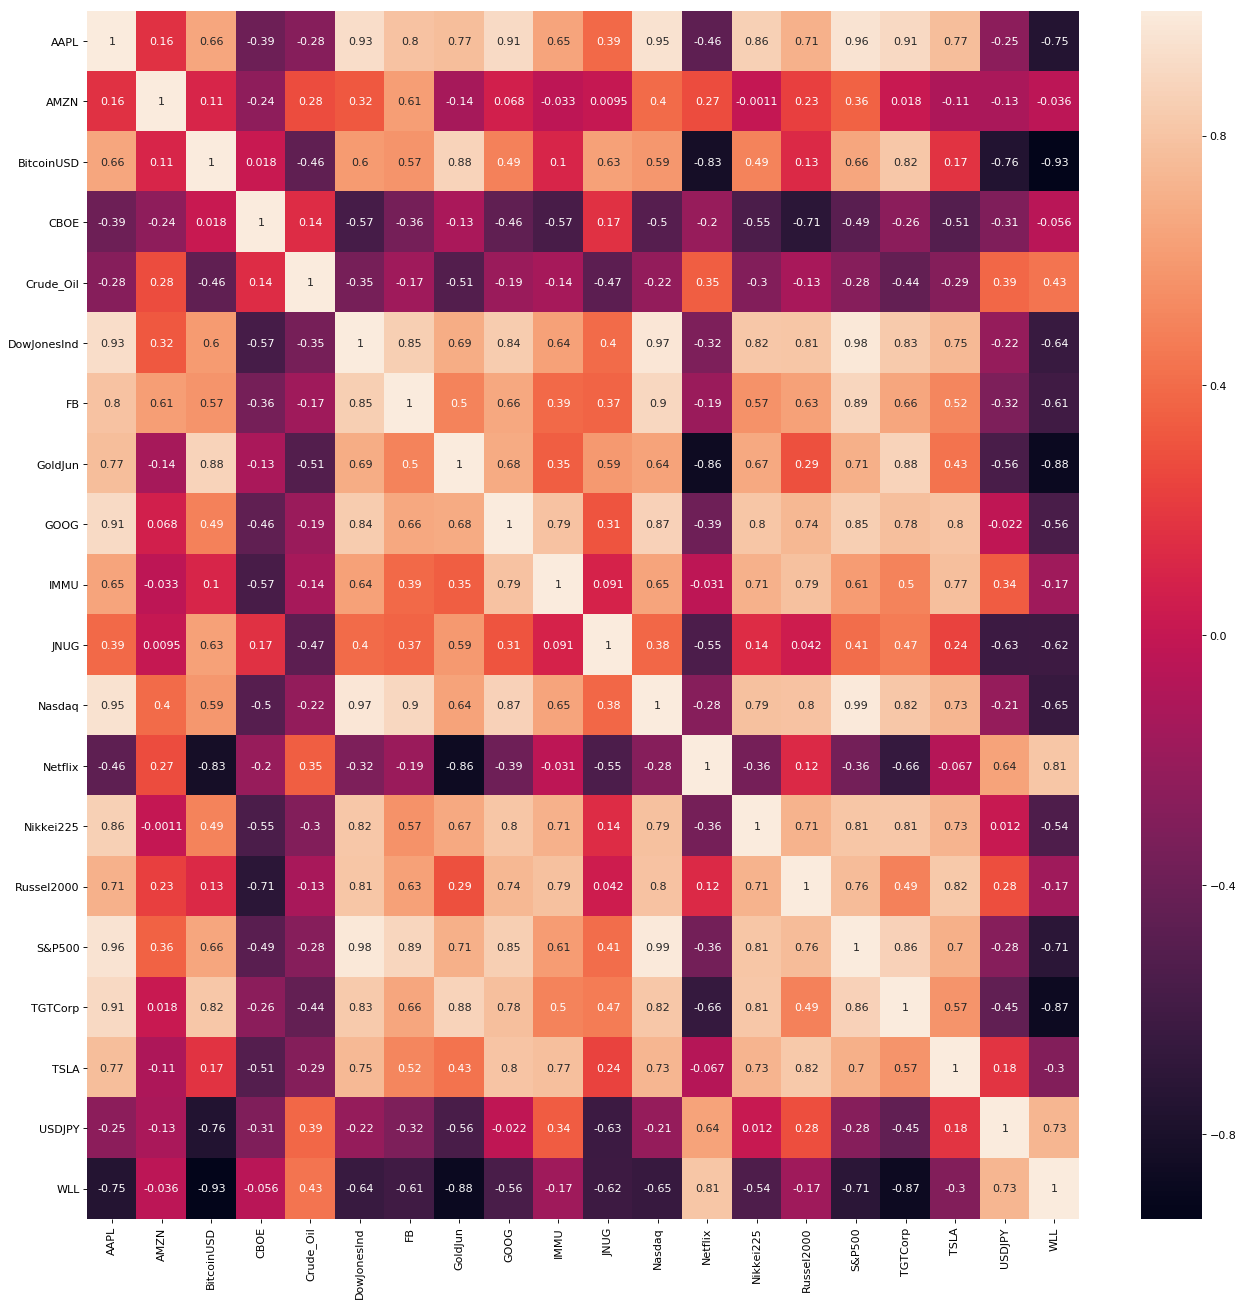

In [8]:
plt.figure(figsize=(20,20),dpi=80)
sn.heatmap(corrMatrix, annot=True)
plt.savefig('dataNWCorMat.png')
plt.show()

In [9]:
dataNW.shape

(242, 20)

In [10]:
corrMatrix.size

400

In [11]:
#cor1 = corrMatrix.as_matrix()
#cor1[0, 12]

In [78]:
#C=corrMatrix.as_matrix()
C=pd.DataFrame.to_numpy(corrMatrix)
print(C)

[[ 1.          0.16220327  0.65946024 -0.39476451 -0.28041806  0.92978607
   0.7954827   0.76906442  0.90976053  0.64797361  0.38972972  0.95181796
  -0.46149896  0.85704687  0.70948349  0.96035366  0.90661022  0.77282811
  -0.25240527 -0.74919903]
 [ 0.16220327  1.          0.10728464 -0.24229931  0.27715422  0.32169994
   0.61474924 -0.13535531  0.06783072 -0.03265947  0.00950968  0.40185223
   0.27496215 -0.00113801  0.22656006  0.36036341  0.01834292 -0.10577449
  -0.12603107 -0.03576415]
 [ 0.65946024  0.10728464  1.          0.01834123 -0.45647444  0.60073104
   0.56921946  0.87803186  0.48961162  0.10490881  0.63039253  0.58821097
  -0.82680043  0.49455785  0.12538505  0.65793435  0.81839564  0.17208833
  -0.76082795 -0.9349856 ]
 [-0.39476451 -0.24229931  0.01834123  1.          0.14477937 -0.57418258
  -0.3602136  -0.12521312 -0.4586584  -0.56859436  0.16698639 -0.50164791
  -0.20392624 -0.54989827 -0.71047477 -0.48836857 -0.25893359 -0.51166709
  -0.31432927 -0.05573589]
 [-0

# 2-Adjacency matrix obtained from the Correlation Matrix

To get the adjacency matrix $A$  , we us he correlation matrix $C=(x_{ij})$ above such that $a_{ij}=\begin{cases} 1 &\text{if $|x_{ij}|>c$ and $i\neq j$}\\0 &\text{otherwise} \end{cases}$ 

where the value $c$ can be chosen empirically after seen the correlation matrix.

In [79]:
c=0.6
A=np.zeros((20,20))
for i in range(20):
    for j in range(20):
        if i==j or abs(C[i,j])<c:   
            A[i,j]=0
        else:
            A[i,j]=1
print(A)      

[[0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.

In [80]:
G=nx.from_numpy_matrix(A)


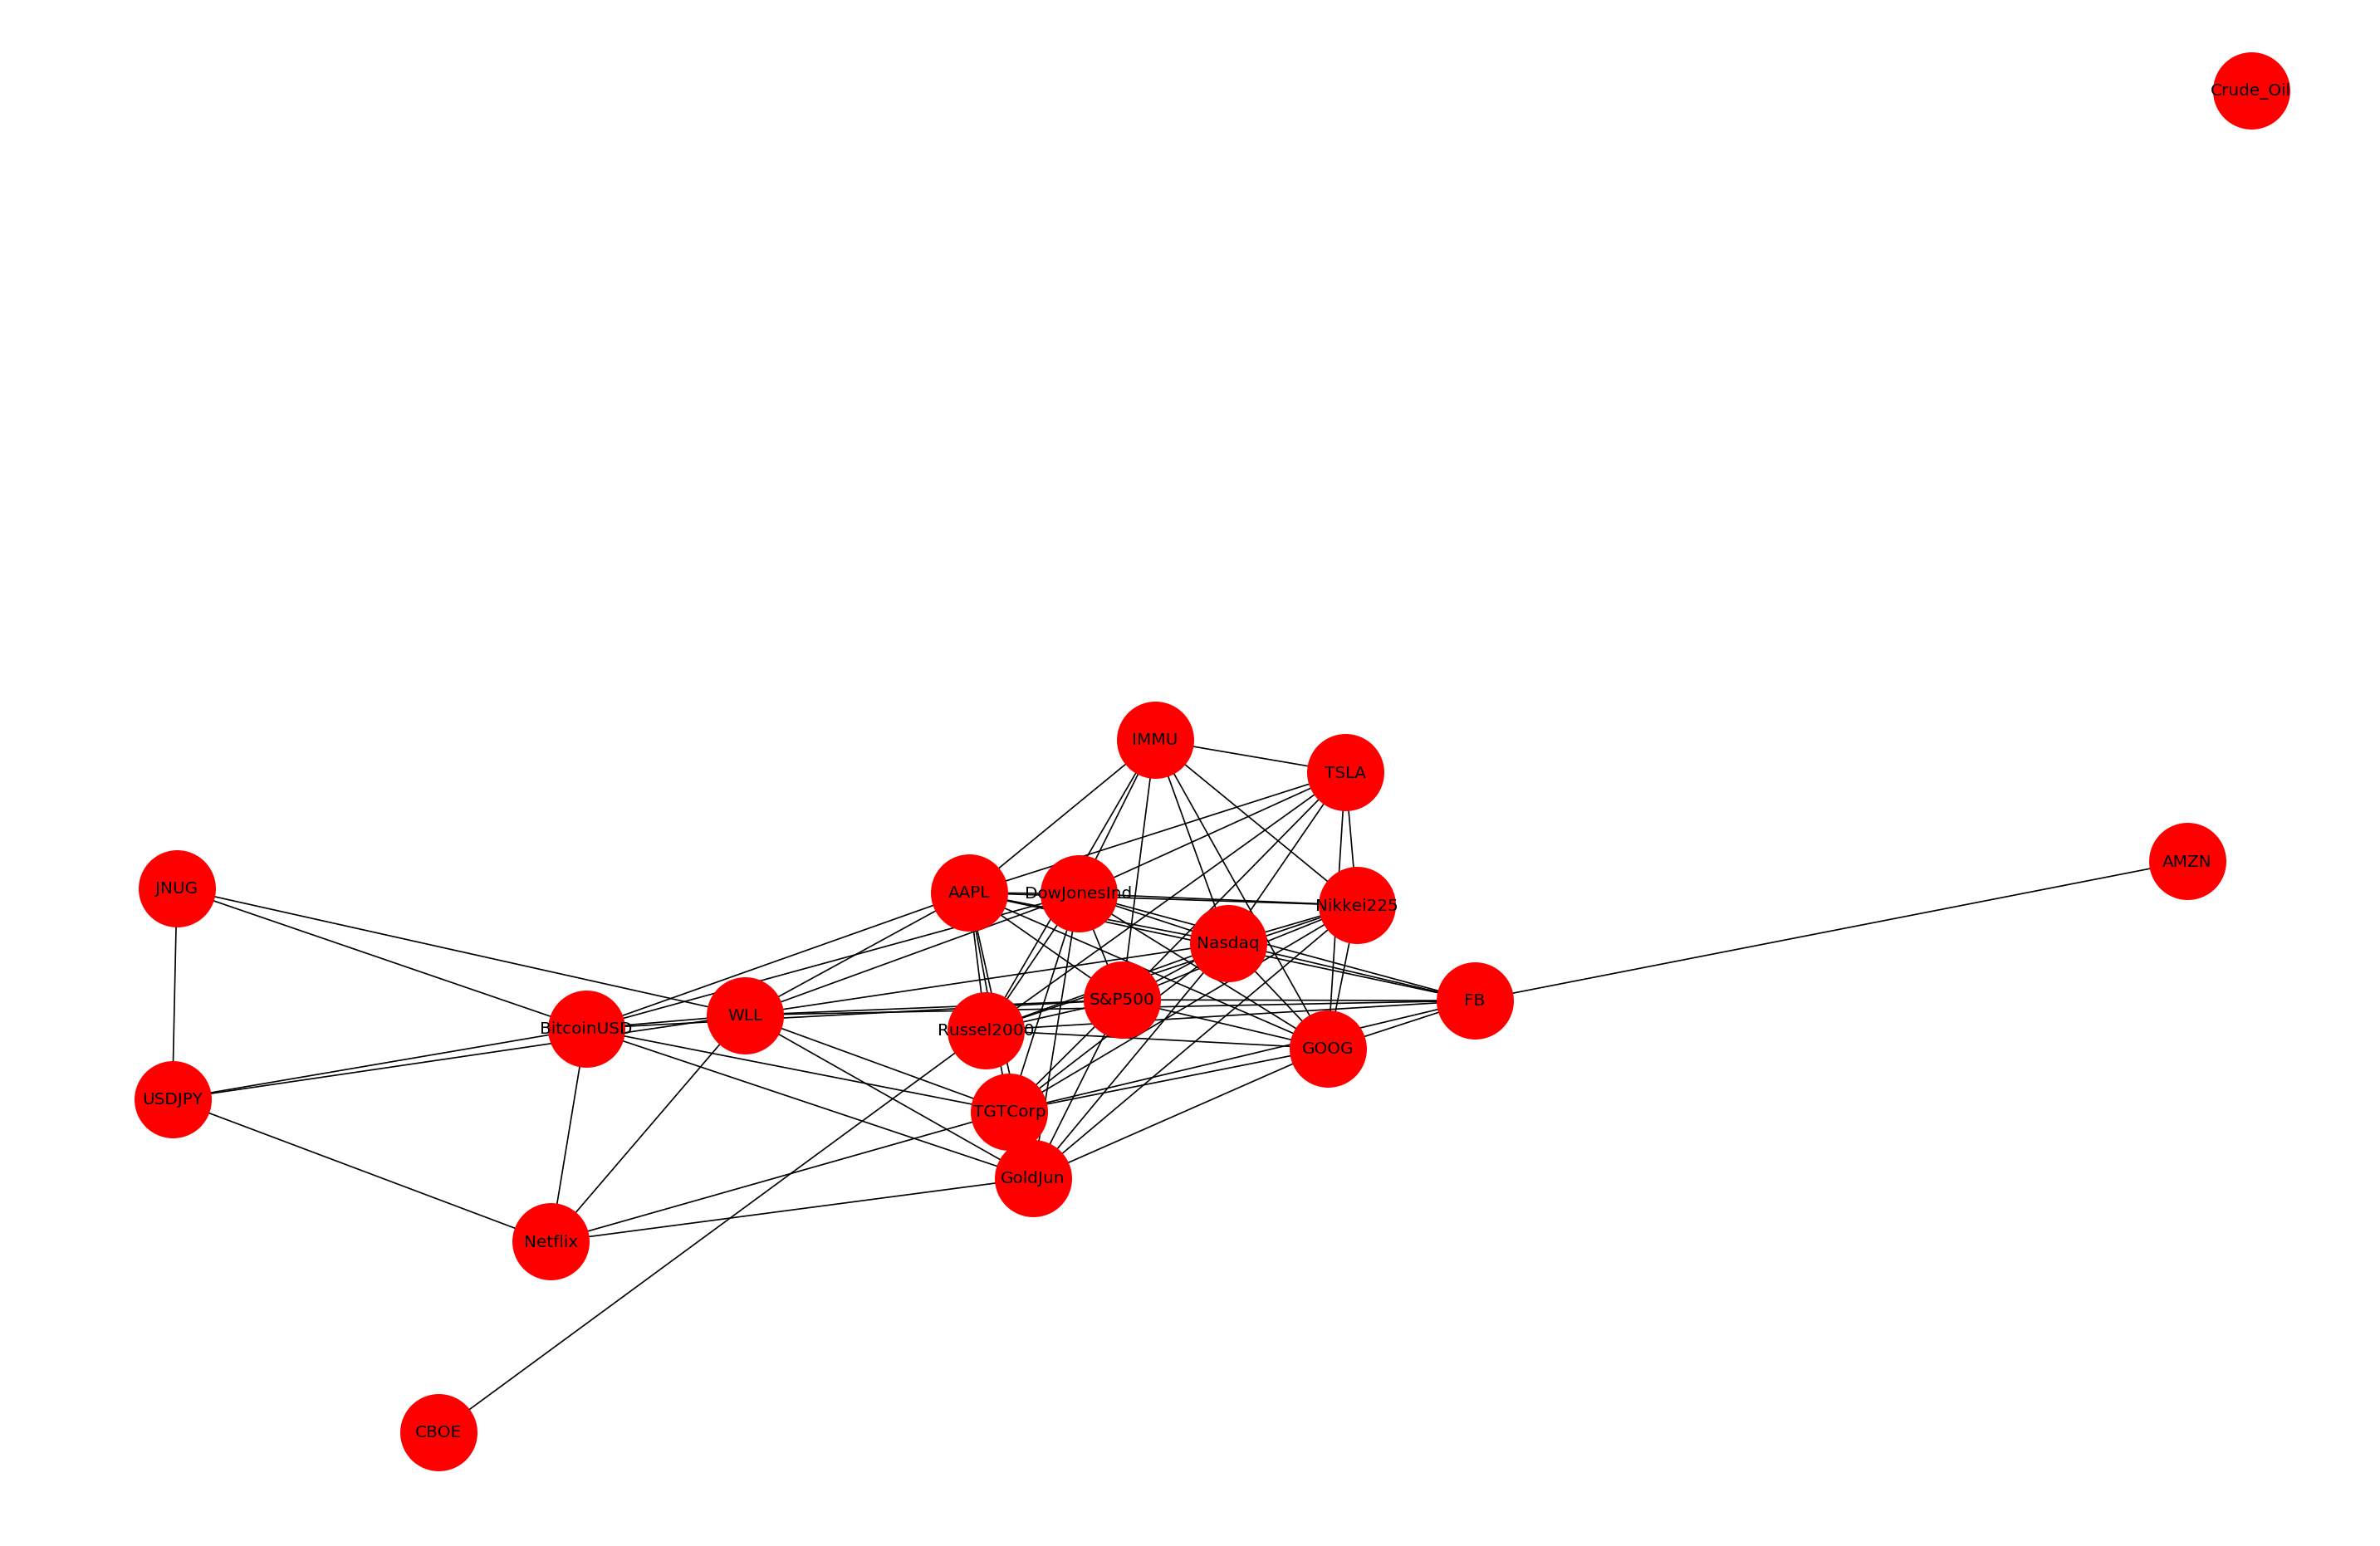

In [81]:
plt.figure(figsize=(30,20),dpi=120)
plt.clf()
pos2=nx.spring_layout(G,k=0.6,iterations=50)
nx.draw_networkx(G,pos2,labels=labels,node_size=3000)
plt.axis('off')
plt.savefig("G.png")
plt.show()

# 3-Fragments

Let's compute the number of $P_1, P_2, P_3, C_3, C_4, T_{3,1}, C_5, S_{1,3}$ using the formula in the notes.

$P_1$ is the number of edges

In [82]:
def P1(G):
    return nx.number_of_edges(G)

In [83]:
print("The number of P1 is %d" %P1(G))  

The number of P1 is 81


$P_2 = \frac{1}{2}\sum_{i}k_i(k_i-1)$ with $k_i$ is the degree of the node $i$.

In [84]:
def P2(G):
    a = 0
    k = nx.degree(G)
    n = nx.number_of_nodes(G)
    for i in range(n):
        a += k[i]*(k[i]-1)   
    return a/2

In [85]:
print("The number of P2 is %d" %P2(G))

The number of P2 is 747


$C_3 = \frac{1}{6}tr(A^3)=\frac{1}{6}\sum_{i} \mu^3$ with $\mu$ is the eigenvalue of the adjacency matrix

In [86]:
def C3(G):
    A = nx.to_numpy_matrix(G)
    mu,v = lg.eigh(A)    #taking the eigenvalues and eigenvectors of A
    C3 = sum(mu**3)
    return C3/6

In [87]:
print("The number of C3 is %f" %C3(G))

The number of C3 is 187.000000


$P_3 = \sum_{(i,j)\in E}(k_i-1)(k_j-1)-3|C3|$ with $E$ is the sets of edges.

In [88]:
def P3(G):
    a = 0
    k = nx.degree(G)
    n = nx.number_of_nodes(G)
    for i in range(n):
        for j in range(n):
            if (i,j) in G.edges():      #test if (i,j) is an edge, as in the above formula 
                a +=(k[i]-1)*(k[j]-1)
    return a/2-3*C3(G)
    

In [89]:
print("The number of P3 is %f" %P3(G))

The number of P3 is 6411.000000


$C_4 = \frac{1}{8}(tr(A^4)-4|P_2|-2m) = \frac{1}{8}(\sum_{i}\mu^4-4|P_2|-2m)$ with $m$ is the number of edges.

In [90]:
def C4(G):
    A = nx.to_numpy_matrix(G)
    mu,v = lg.eigh(A)
    m = nx.number_of_edges(G)
    C4 = (1/8)*(sum(mu**4)-(4*P2(G))-(2*m))
    return C4

In [91]:
print("The number of C4 is %f" %C4(G))

The number of C4 is 1120.000000


$T_{3,1} = \sum_{i}t_i(k_i-2)$ with $t_i$ is the number of tirangles that involve the node $i$

In [92]:
def T3_1(G):
    F6 = 0
    t = nx.triangles(G)     #take the number of triangle that involve each node(vector quantity)
    k = nx.degree(G)
    n = nx.number_of_nodes(G)
    for i in range(n):
        F6 += t[i]*(k[i]-2)
    return F6

In [93]:
print("The number of T3_1 is %f" %T3_1(G))

The number of T3_1 is 4961.000000


$C_5 = \frac{1}{10}(tr(A^5)-30|C_3|-10|T_{3,1}|) = \frac{1}{10}(\sum_{i}\mu^5-30|C_3|-10|T_{3,1}|)$

In [94]:
def C5(G):
    A = nx.to_numpy_matrix(G)
    mu,v = lg.eigh(A)
    C5 = (1/10)*(sum(mu**5)-(30*C3(G))-(10*T3_1(G)))
    return C5

In [95]:
print("The number of C5 is %f" %C5(G))

The number of C5 is 6616.000000


$S_{1,3}=\frac{1}{6}\sum_{i}(k_i(k_i-1)(k_i-2))$

In [96]:
def S1_3(G):
    S1_3 = 0
    k = nx.degree(G)
    n = nx.number_of_nodes(G)
    for i in range(n):
        S1_3 += k[i]*(k[i]-1)*(k[i]-2)
    return S1_3/6

In [97]:
print("The number of S1_3 is %f" %S1_3(G))

The number of S1_3 is 2228.000000


# 4-Centrality

The degree centrality of every node of the network

In [98]:
print(nx.degree_centrality(G))

{0: 0.6842105263157894, 1: 0.05263157894736842, 2: 0.47368421052631576, 3: 0.05263157894736842, 4: 0.0, 5: 0.6842105263157894, 6: 0.47368421052631576, 7: 0.5263157894736842, 8: 0.5789473684210527, 9: 0.42105263157894735, 10: 0.15789473684210525, 11: 0.631578947368421, 12: 0.2631578947368421, 13: 0.5263157894736842, 14: 0.5263157894736842, 15: 0.6842105263157894, 16: 0.5789473684210527, 17: 0.42105263157894735, 18: 0.21052631578947367, 19: 0.5789473684210527}


To identify the highest centrality, we have to look the node with biggest value of degree centrality. So let's see $5\%$ of them in the picture 

In [99]:
number = int(nx.number_of_nodes(G)*0.05)  #5% percent of the number of nodes

In [107]:
#create a function who take 2 arguments: the network G and the measure of centrality
# this function print the nodes with highest centrality, plot the network and highlight them.
def centrality_plot(G ,a):        
    v = [(a[i],i) for i in a] #create a list with the measure of centrality the first and the node the second
    l = sorted(v)             #sort the list so that we can extract the high value of the degree centrality
    C = []
    n = nx.number_of_nodes(G)
    color = []
    for i in range(1,(number+2)):
        C.append(l[-i][1])
    for i in range(n):
        if i in C:
            color.append('r')
        else:
            color.append('cyan')
    print("the nodes with the highest centrality are :",C)
    print("They are represented by red in the picture below.")
    plt.figure(figsize= (40,40), dpi= 120)
    plt.clf()
    pos=nx.spring_layout(G,k=0.6, iterations = 50)
    nx.draw_networkx(G,pos,node_color=color,labels=labels,node_size=3000)
    plt.axis('off')
    plt.show()

the nodes with the highest centrality are : [15, 5]
They are represented by red in the picture below.


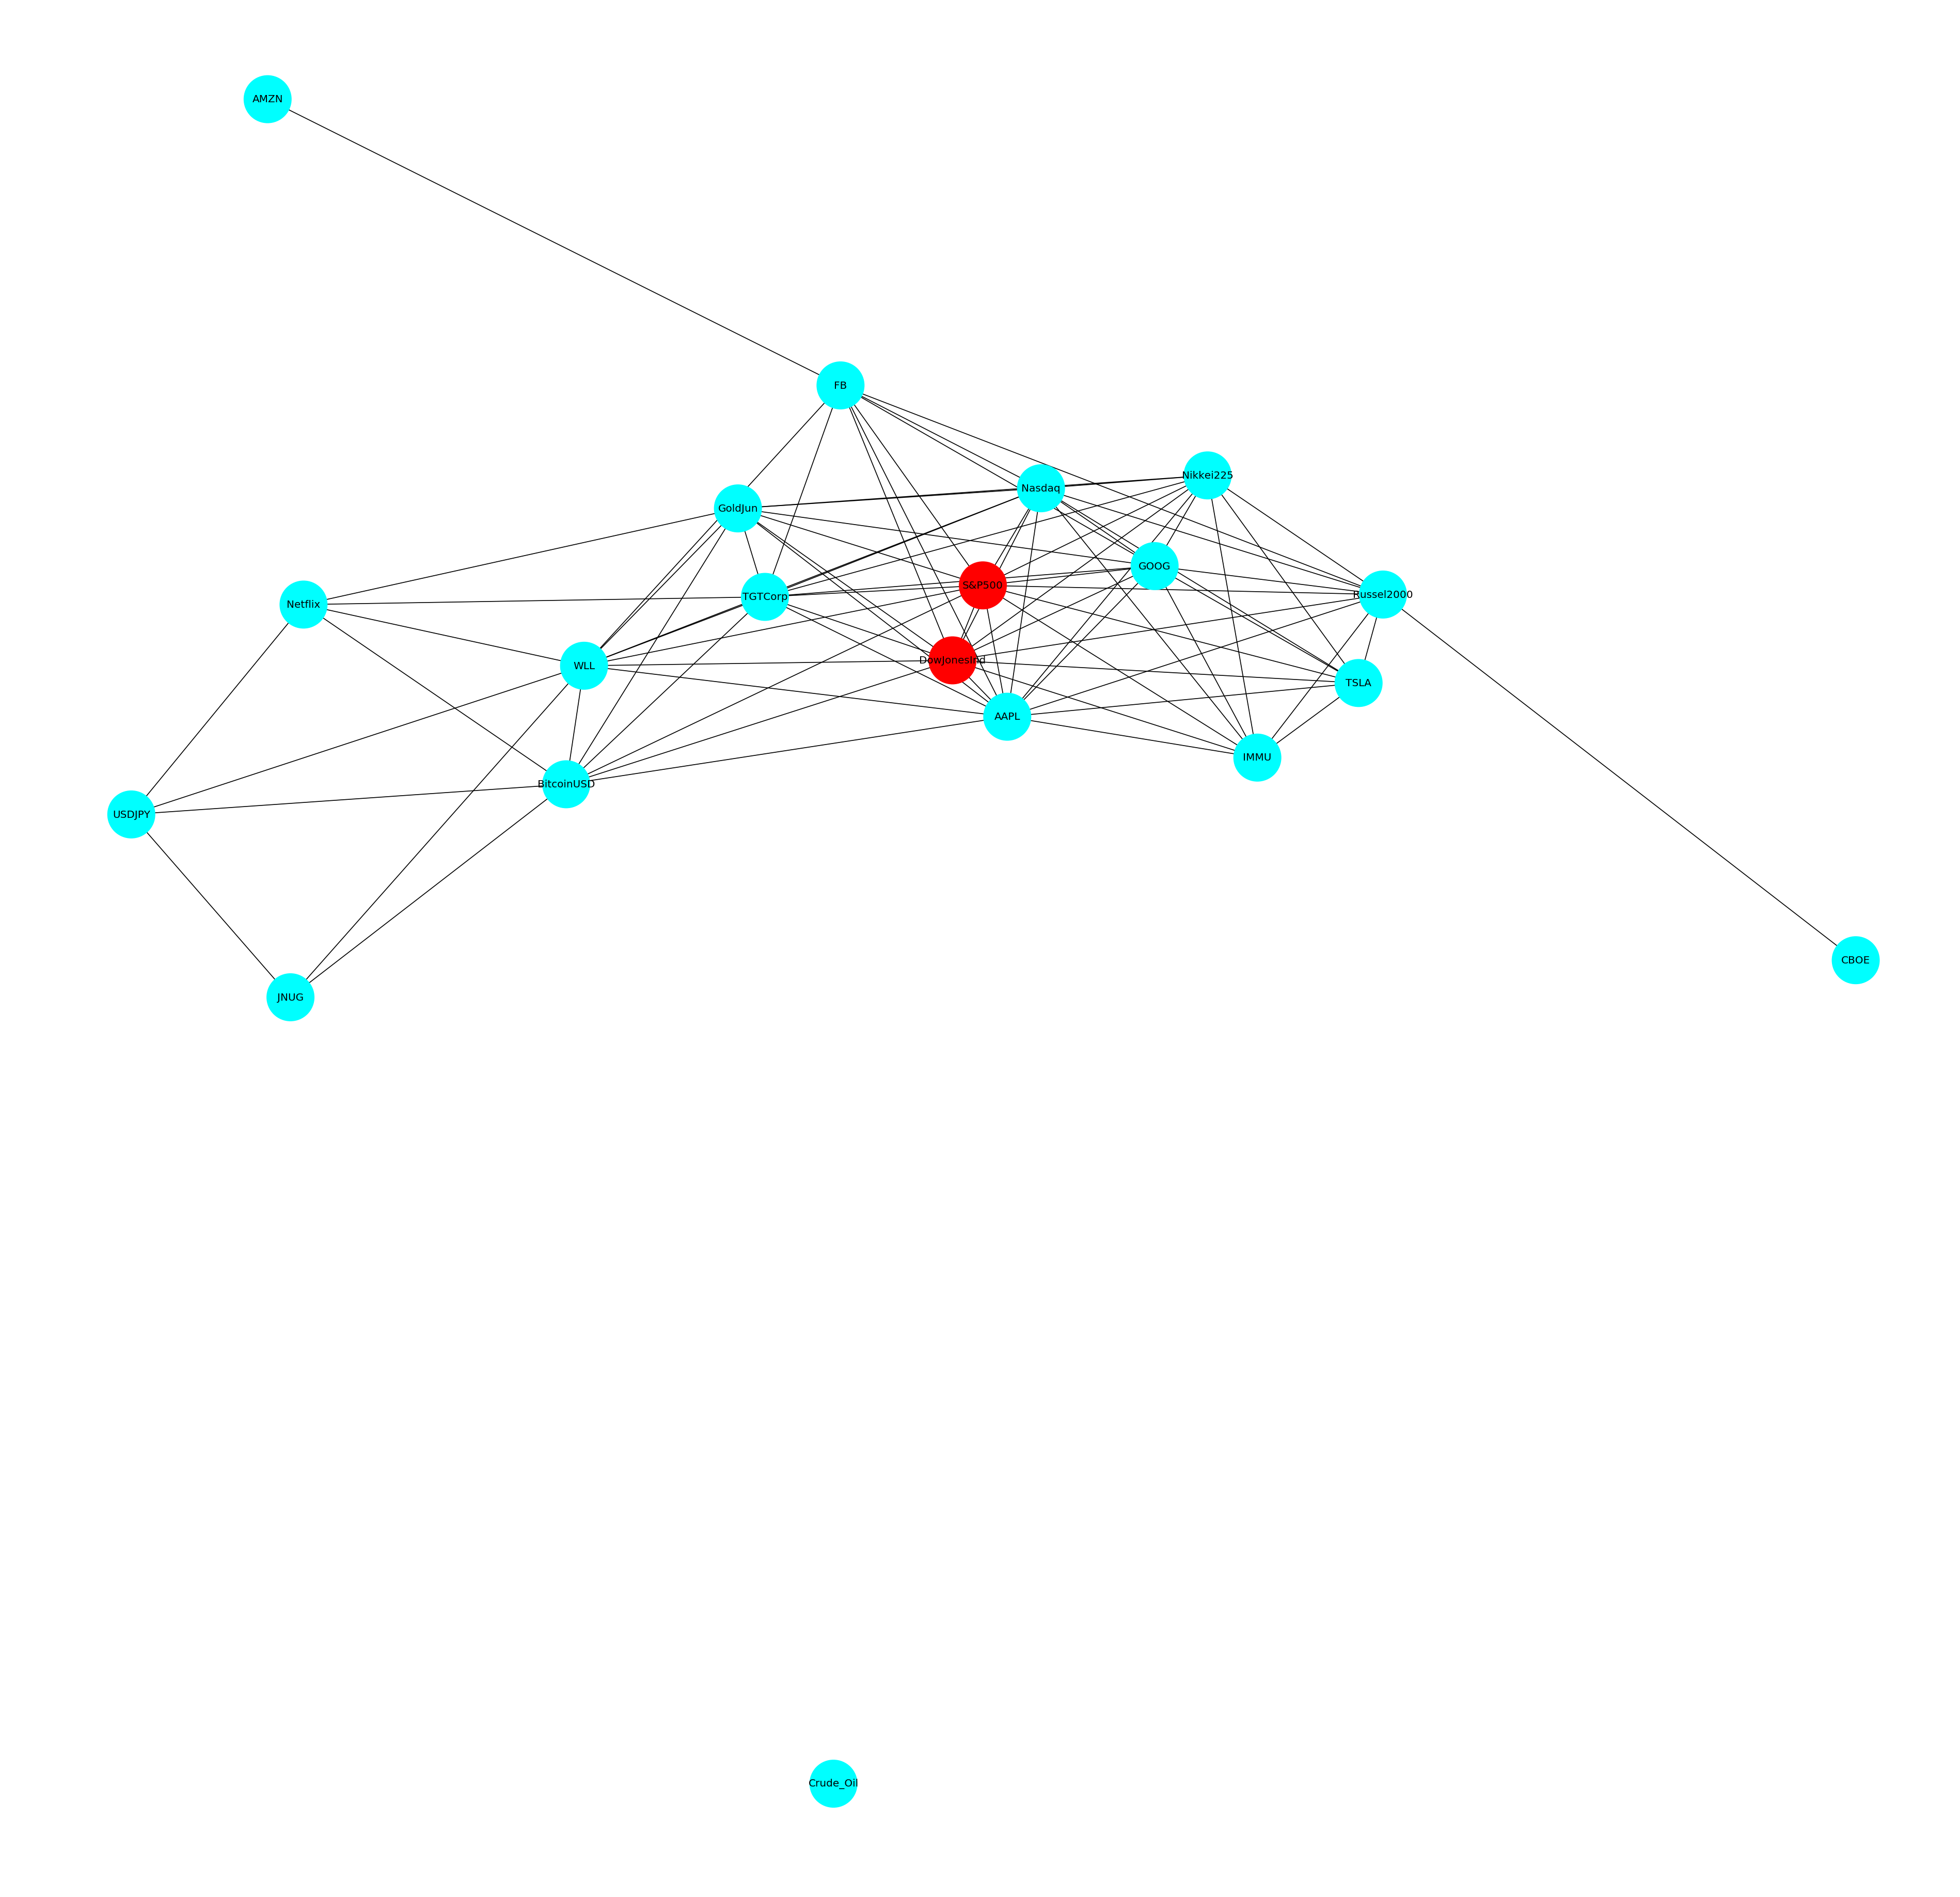

In [108]:
centrality_plot(G,nx.degree_centrality(G))

Now, let's compute and plot two others centralities of the network: one classical and one spectral.
For classical, we choose betweeness centrality, and for spectral we choose Katz centrality or eigenvector centrality.

In [109]:
print(nx.betweenness_centrality(G))

{0: 0.056277097274327184, 1: 0.0, 2: 0.06537286454183962, 3: 0.0, 4: 0.0, 5: 0.056277097274327184, 6: 0.10920356446672233, 7: 0.028982872057664304, 8: 0.017104163918568345, 9: 0.0, 10: 0.0, 11: 0.03350210372371037, 12: 0.0056337424758477386, 13: 0.009863840888771637, 14: 0.10498468393205235, 15: 0.056277097274327184, 16: 0.04106864203817113, 17: 0.0, 18: 0.001949317738791423, 19: 0.12695320479253996}


the nodes with the highest centrality are : [19, 6]
They are represented by red in the picture below.


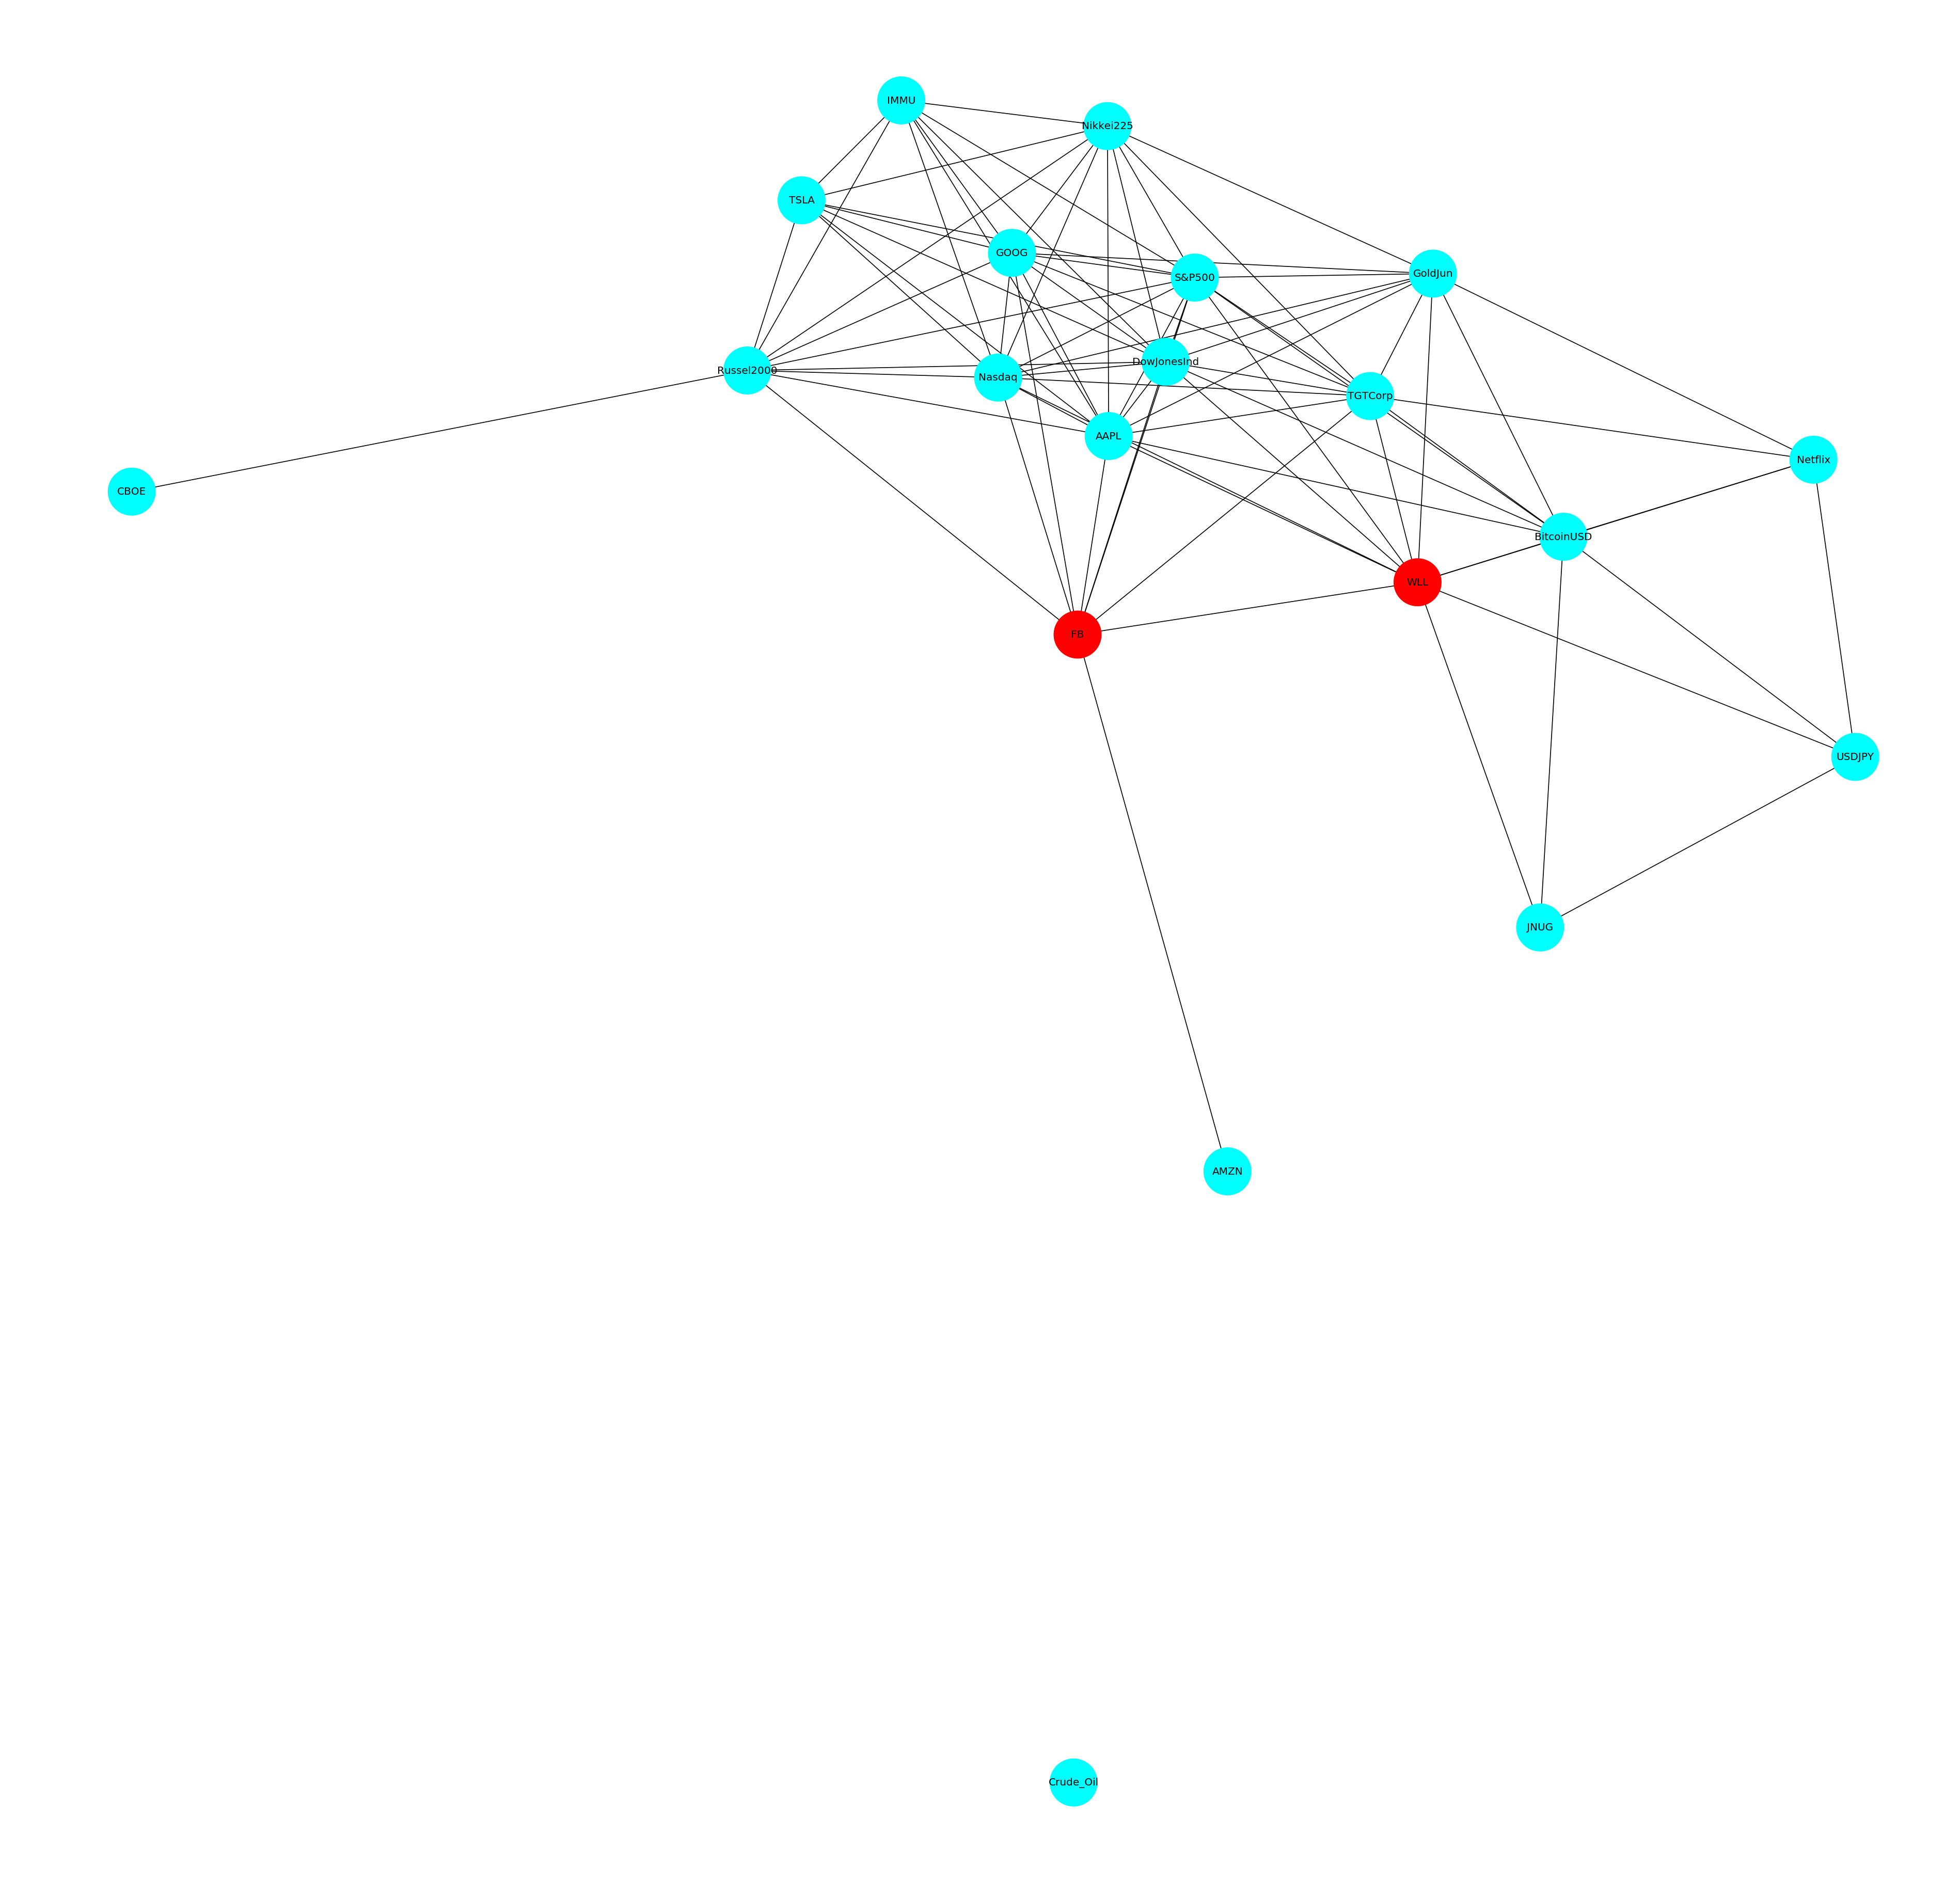

In [110]:
centrality_plot(G,nx.betweenness_centrality(G))

In [111]:
#print(nx.katz_centrality(G))

In [112]:
#centrality_plot(G,nx.katz_centrality(G))

In [113]:
print(nx.eigenvector_centrality(G))

{0: 0.32194219220294995, 1: 0.021537157342778626, 2: 0.18411498377124047, 3: 0.023286364353202107, 4: 4.1832232820535725e-16, 5: 0.32194219220294995, 6: 0.22359981331466772, 7: 0.2507598666879285, 8: 0.2855039475584502, 9: 0.2200705501768927, 10: 0.045098568642480415, 11: 0.3057661442890775, 12: 0.09529739547132067, 13: 0.26585899372256466, 14: 0.2417613682147449, 15: 0.32194219220294995, 16: 0.2704048205238139, 17: 0.2200705501768927, 18: 0.05347129782641721, 19: 0.23062380235415766}


the nodes with the highest centrality are : [15, 5]
They are represented by red in the picture below.


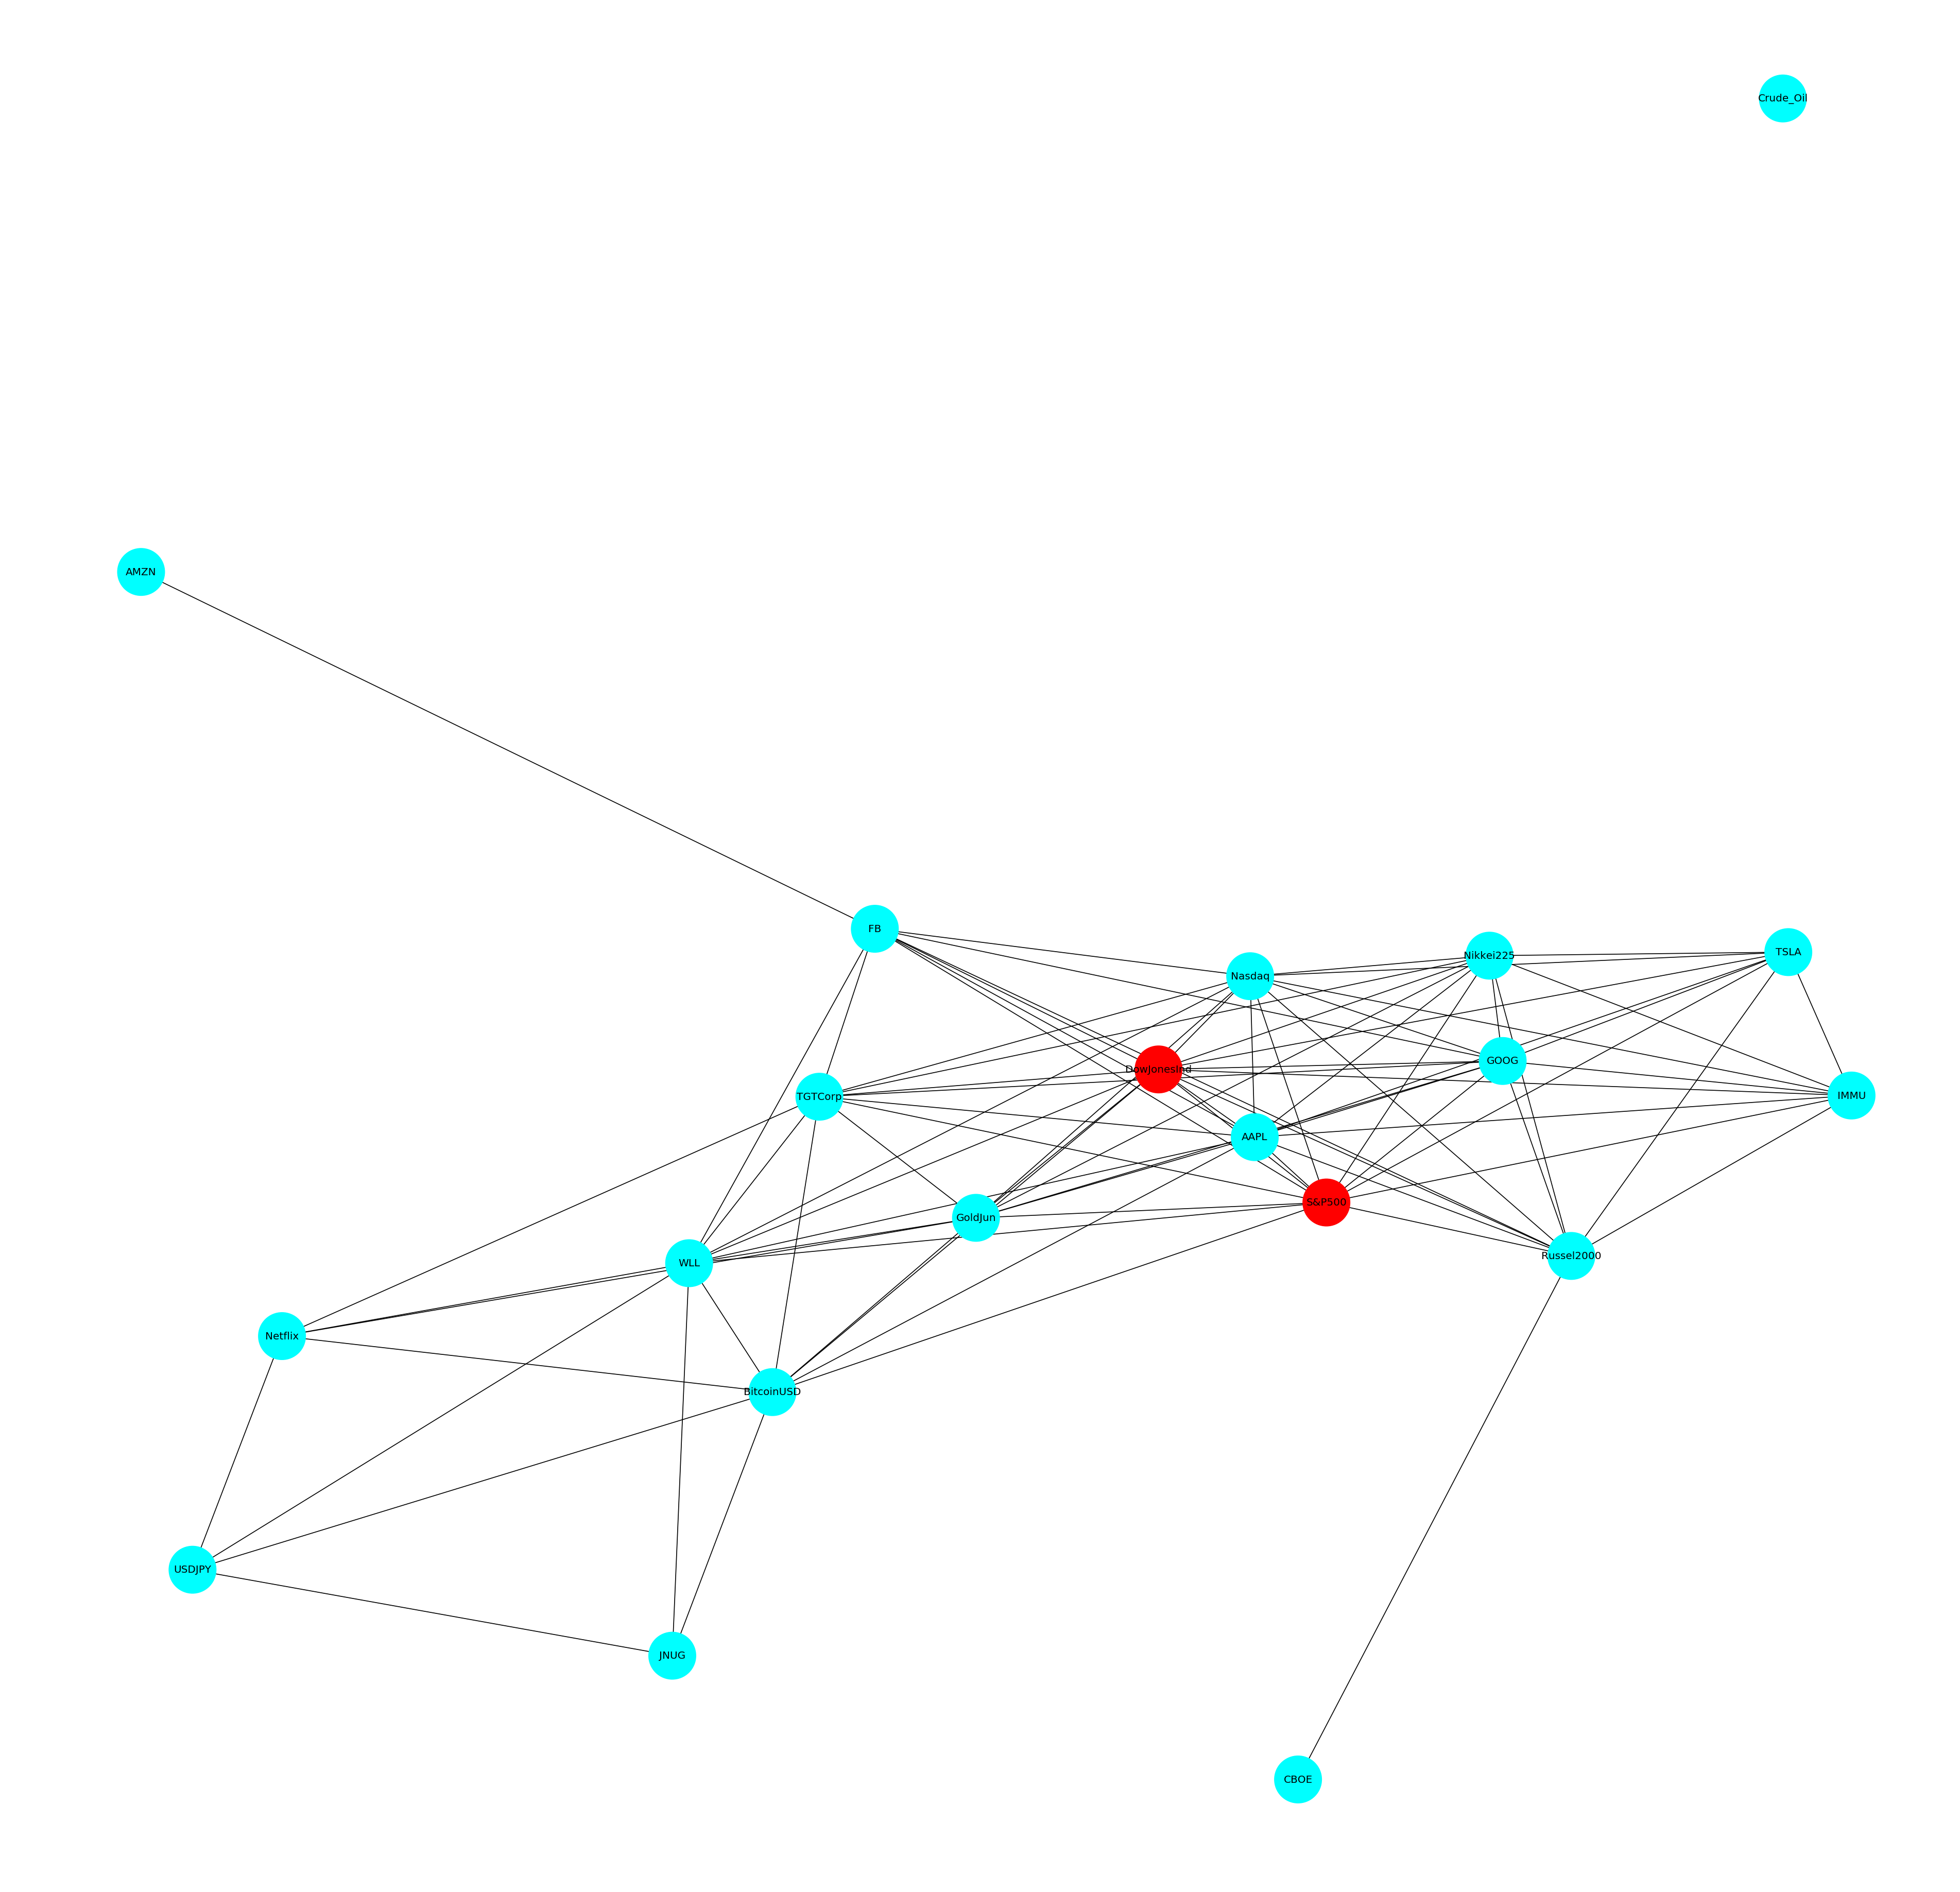

In [114]:
centrality_plot(G,nx.eigenvector_centrality(G))

In [115]:
clos_cen=nx.closeness_centrality(G)
print(clos_cen)

{0: 0.7414187643020594, 1: 0.3875598086124402, 2: 0.588021778584392, 3: 0.3707093821510297, 4: 0.0, 5: 0.7414187643020594, 6: 0.631578947368421, 7: 0.6090225563909775, 8: 0.631578947368421, 9: 0.5328947368421052, 10: 0.4159178433889602, 11: 0.7105263157894737, 12: 0.46088193456614507, 13: 0.588021778584392, 14: 0.588021778584392, 15: 0.7414187643020594, 16: 0.6558704453441295, 17: 0.5328947368421052, 18: 0.4263157894736842, 19: 0.6558704453441295}


the nodes with the highest centrality are : [15, 5]
They are represented by red in the picture below.


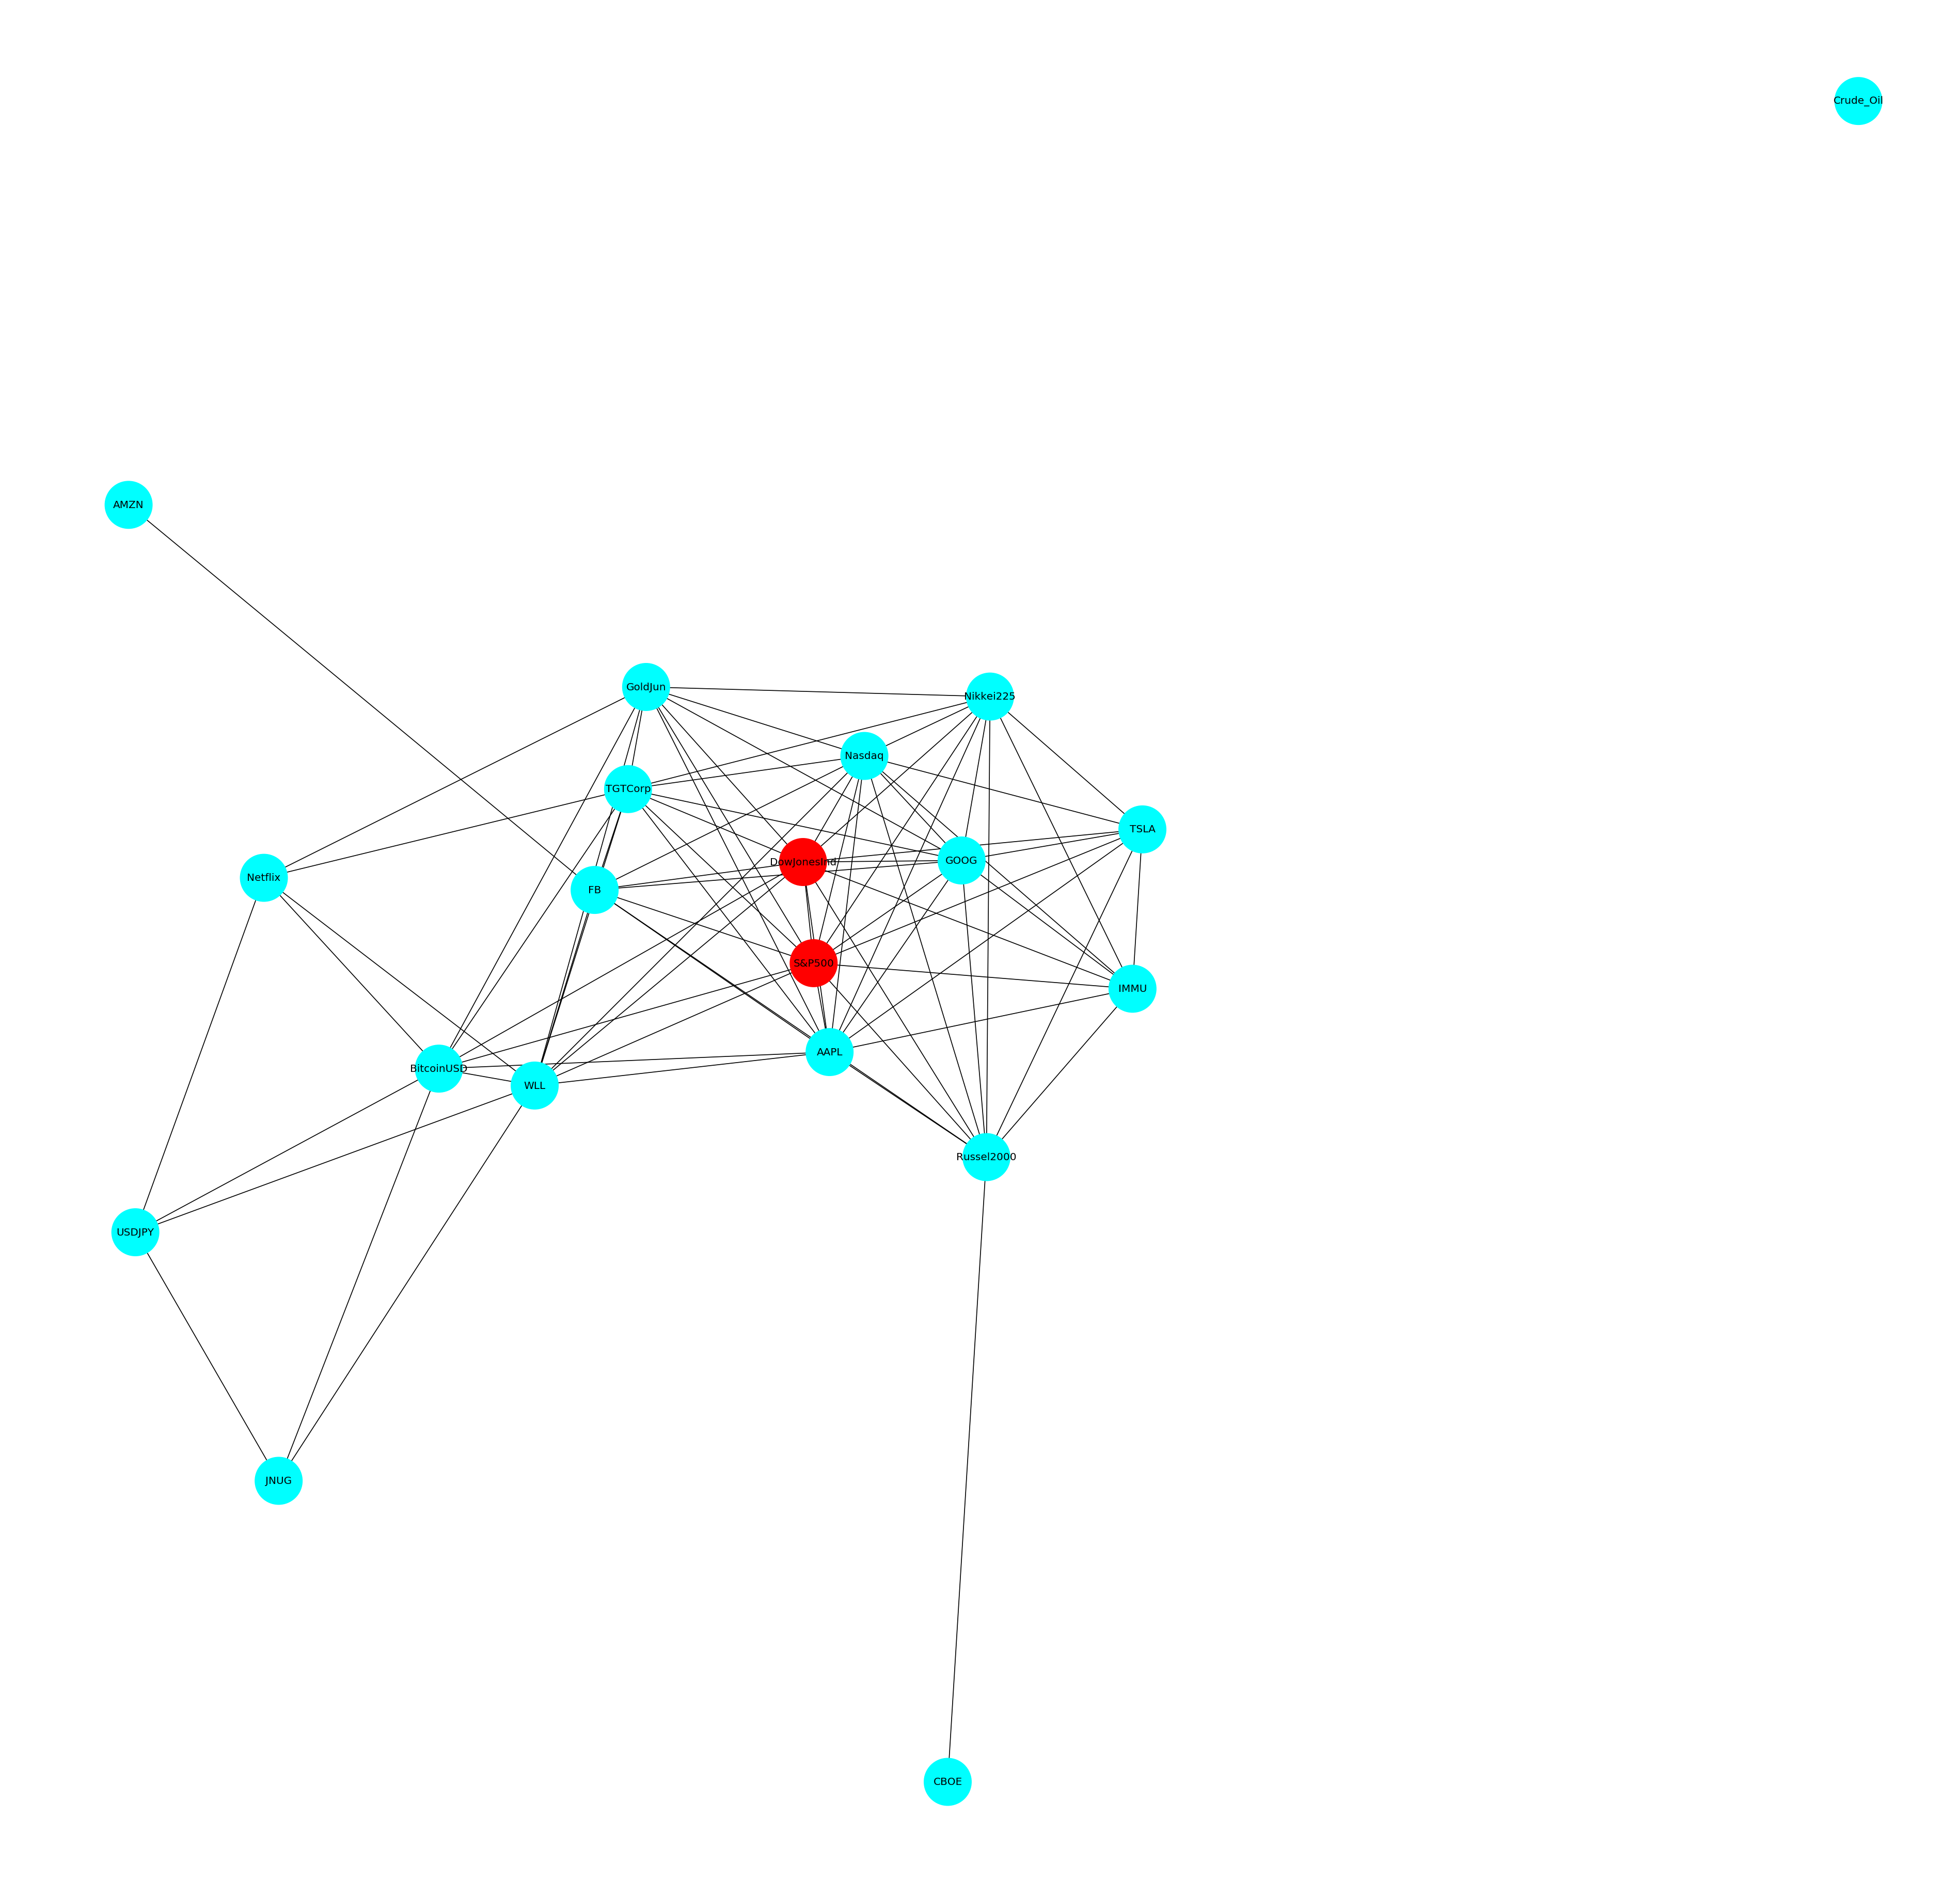

In [116]:
centrality_plot(G,nx.closeness_centrality(G))

# 3-Network motifs

We can generate an Erdos Renyi graph based on our real word graph, more precisely we can use the number of edges and nodes in our real words to create an Erdos Renyi graph.
We know that the creation of an Erdos Renyi graph need $2$ arguments: the number of nodes and the probability $p$ of creating an edge.

So First, let's find the probability $p$, we have: $\overline{m}=\dfrac{n(n-1)p}{2}$ with $\overline{m}$ is the excpected number edges and $n$ the number of nodes. Using the number of edges in our real world as the expected number of edges in the Erdos Renyi and the same number of nodes, we have : $p = \dfrac{2m}{n(n-1)}$

In [117]:
p = (2.*nx.number_of_edges(G))/(nx.number_of_nodes(G)*(nx.number_of_nodes(G)-1))
p

0.4263157894736842

The number of edges in the Erdos-Renyi graph is 80


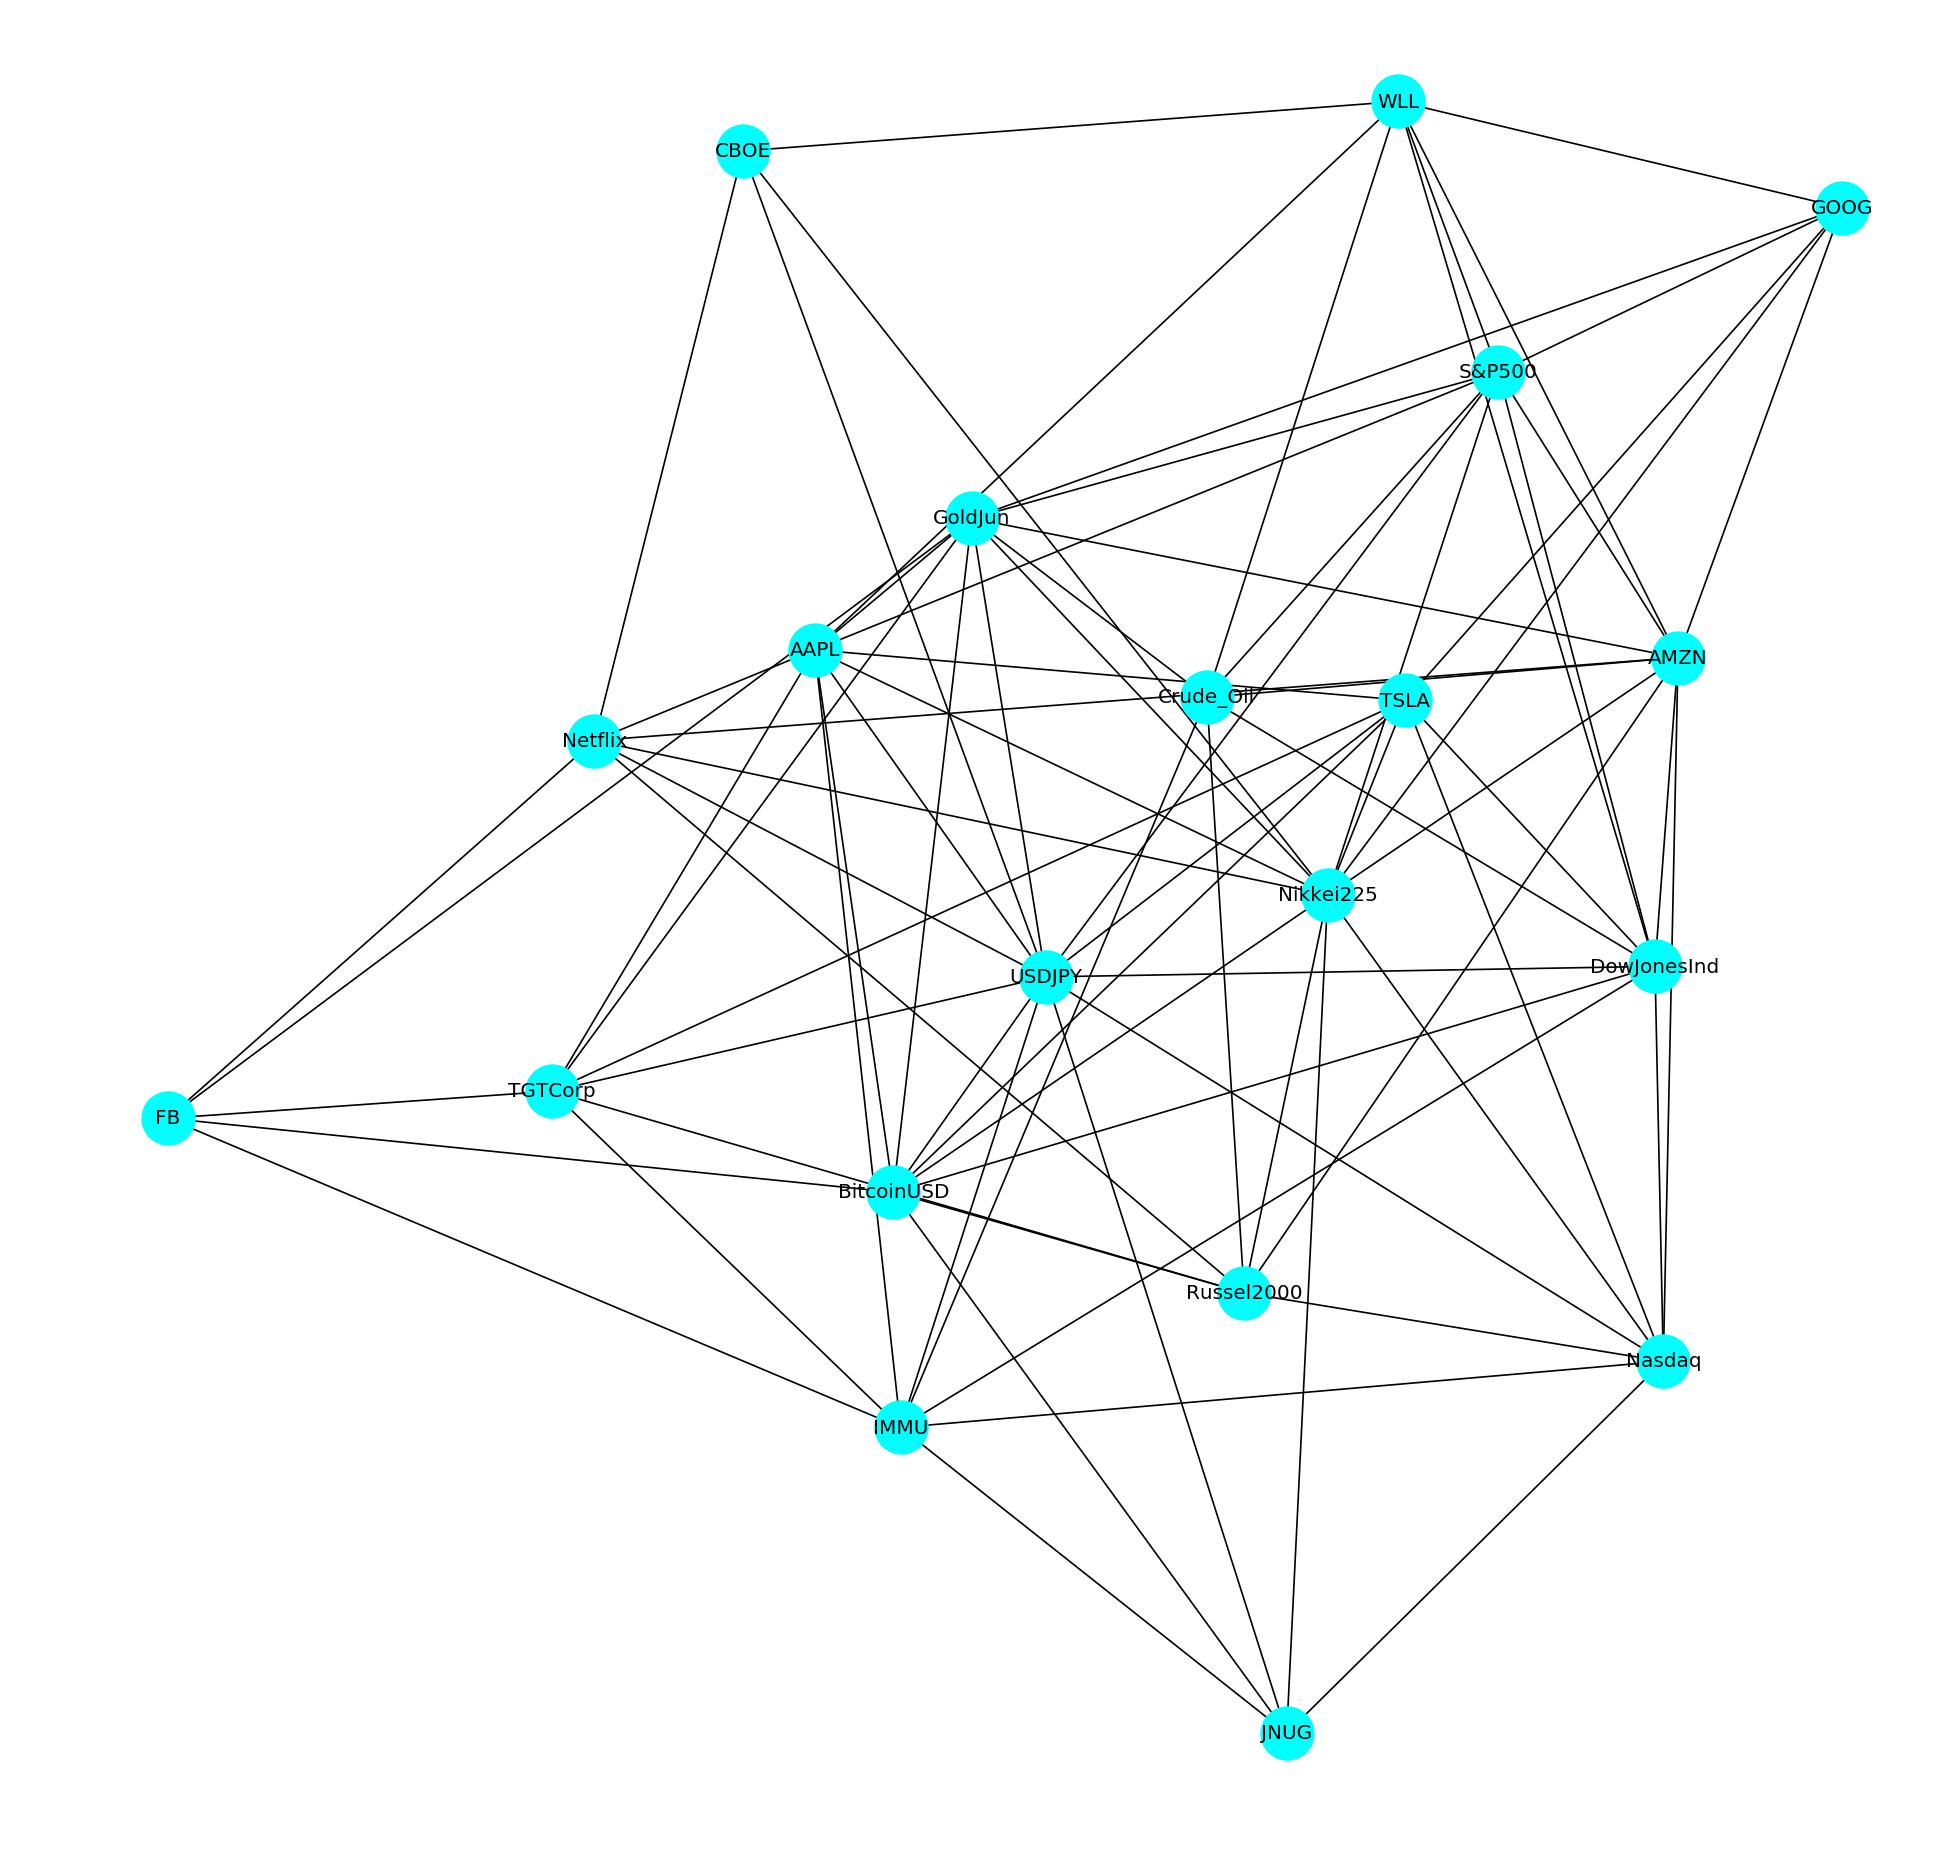

In [118]:
Erdos_Renyi = nx.erdos_renyi_graph(nx.number_of_nodes(G),p) #create the Erdos_Renyi graph
print("The number of edges in the Erdos-Renyi graph is %d" %nx.number_of_edges(Erdos_Renyi))
plt.figure(figsize= (20,20),dpi=120)
plt.clf()
pos=nx.spring_layout(Erdos_Renyi)
nx.draw_networkx(Erdos_Renyi,pos,node_color='cyan',labels=labels,node_size=1000)
plt.axis('off')
plt.savefig("Erdos_Renyi.png")
plt.show()

Now we can compute the number of $P_1, P_2, P_3, C_3, C_4, T_{3,1}, C_5, S_{1,3}$ in the Erdos Reyni graph using part 1.

In [119]:
print("The number of P2 is %d" %P2(Erdos_Renyi))

The number of P2 is 605


In [120]:
print("The number of P3 is %d" %P3(Erdos_Renyi))

The number of P3 is 4271


In [121]:
print("The number of C3 is %d" %C3(Erdos_Renyi))

The number of C3 is 85


In [122]:
print("The number of C4 is %d" %C4(Erdos_Renyi))

The number of C4 is 441


In [123]:
print("The number of T3_1 is %d" %T3_1(Erdos_Renyi))

The number of T3_1 is 1795


In [124]:
print("The number of C5 is %d" %C5(Erdos_Renyi))

The number of C5 is 2279


In [125]:
print("The number of S1_3 is %d" %S1_3(Erdos_Renyi))

The number of S1_3 is 1439


But we need to repeat the computation at least 50 times
so 

we need a function to do this and record the mean of each fragments

In [126]:
#create a function who take an argument the number 
#of times we want to repeat the process 
#and return the mean of each fragments
def frequencies(times):
    P_2 = []
    P_3 = []
    C_3 = []
    C_4 = []
    T_3_1 = []
    C_5 = []
    S_1_3 = []   
    n = nx.number_of_nodes(G)
    for i in range(times):
        G2 = nx.erdos_renyi_graph(n,p)
        P_2.append(P2(G2))
        P_3.append(P3(G2))
        C_3.append(C3(G2))
        C_4.append(C4(G2))
        T_3_1.append(T3_1(G2))
        C_5.append(C5(G2))
        S_1_3.append(S1_3(G2))
    return (mean(P_2)*1.),(mean(P_3)*1.),(mean(C_3)*1.),(mean(C_4 )*1.),(mean(T_3_1)*1.),(mean(C_5)*1.),(mean(S_1_3)*1.)

In [127]:
frequencies(50)

(612.92,
 4403.32,
 87.64,
 464.3600000000001,
 1891.84,
 2511.1800000000017,
 1474.72)

The relative abundance for each fragment in the real world networks.
We can use:

$\alpha_i = \dfrac{N_i^{real}-<N_i^{random}>}{N_i^{real}+<N_i^{random}>}$ with $N_i$ is the numbers of times $i$ appears.

In [128]:
f = frequencies(50)

In [129]:
r1 = (P2(G)-f[0])/(P2(G)+f[0])
print("The relative abundace for P2 is %f"%r1)

The relative abundace for P2 is 0.080370


In [130]:
r2 = (P3(G)-f[1])/(P3(G)+f[1])
print("The relative abundace for P3 is %f"%r2)

The relative abundace for P3 is 0.159531


In [131]:
r3 = (C3(G)-f[2])/(C3(G)+f[2])
print("The relative abundace for C3 is %f"%r3)

The relative abundace for C3 is 0.343294


In [132]:
r4 = (C4(G)-f[3])/(C4(G)+f[3])
print("The relative abundace for C4 is %f"%r4)

The relative abundace for C4 is 0.387323


In [133]:
r5 = (T3_1(G)-f[4])/(T3_1(G)+f[4])
print("The relative abundace for T3_1 is %f"%r5)

The relative abundace for T3_1 is 0.425202


In [134]:
r6 = (C5(G)-f[5])/(C5(G)+f[5])
print("The relative abundace for C5 is %f"%r6)

The relative abundace for C5 is 0.416296


In [135]:
r7 = (S1_3(G)-f[6])/(S1_3(G)+f[6])
print("The relative abundace for S1_3 is %f"%r7)

The relative abundace for S1_3 is 0.179947


# Clustering coefficient

Newman clustering coefficient 

In [136]:
#Newman=3|C3|/|P2|
C=(3*C3(G))/P2(G)
print(C)

0.7510040160642598


Difference of clustering between real-world network and random graph 

In [137]:
#Watts-Strogatz clustering coefficient of the real-world network and random network
clusG=nx.clustering(G)
clusER=nx.clustering(Erdos_Renyi) 

In [138]:
so=0
for i in list(clusG.values()):
    so+=i
    msum=so/len(clusG)
print(so)
print(msum)

13.348290598290596
0.6674145299145298


In [139]:
nx.average_clustering(G)

0.6674145299145298

In [140]:
su=0
for j in list(clusER.values()):
    su+=j
    msum1=su/len(clusER)    
print(su)
print(msum1)

8.546320346320345
0.4273160173160172


In [141]:
nx.average_clustering(Erdos_Renyi)

0.4273160173160172

# Communities detection

In [142]:
n = len(A)
e = np.ones(n)
k = np.dot(A,e)
print(k)

[13.  1.  9.  1.  0. 13.  9. 10. 11.  8.  3. 12.  5. 10. 10. 13. 11.  8.
  4. 11.]


In [143]:
L=np.diagflat(k)-A
#print(L)

In [144]:
# Write down the Fiedler vector of G and use the signs of its elements
# to identify two clusters in the network.
un,vn=lg.eigh(L)
print(un)

[-4.11481778e-15  1.17122459e-15  8.90891873e-01  9.59894760e-01
  1.96446445e+00  3.83140094e+00  5.38583888e+00  7.30999280e+00
  8.71157511e+00  9.00000000e+00  9.72542089e+00  1.06599772e+01
  1.13074481e+01  1.15473632e+01  1.21695293e+01  1.28917841e+01
  1.32790775e+01  1.40000000e+01  1.40000000e+01  1.43653409e+01]


In [145]:
# Find smallest nonzero eigenvalue
for i in range(n):
    if un[i] <1e-10:
        ind = i+1

In [146]:
#Partitioning the the network into 2 parts
#according to the signs of the smallest nonzero eigenvector.
C1=[]
C2=[]
NC3=[]
P = vn[:,ind]

print("elements of community C1")
for i in range(n):
    if P[i]<-1e-13:
        C1.append(i)
print (C1) 

print      
print("elements of community C2")
for i in range(n):
    if P[i]>1e-13:
        C2.append(i)
print (C2)

print("elements in neither community")
for i in range(n):
    if abs(P[i])<1e-13:
        NC3.append(i)
print (NC3)

elements of community C1
[0, 3, 5, 7, 8, 9, 11, 13, 14, 15, 17]
elements of community C2
[1, 2, 6, 10, 12, 16, 18, 19]
elements in neither community
[4]


In [147]:
#highlights of the partitioning into more communities
color=[]
for i in range(n):
    if i in C1:
        color.append('b')
    elif i in C2:
        color.append('r')
    else:
        color.append('g')         

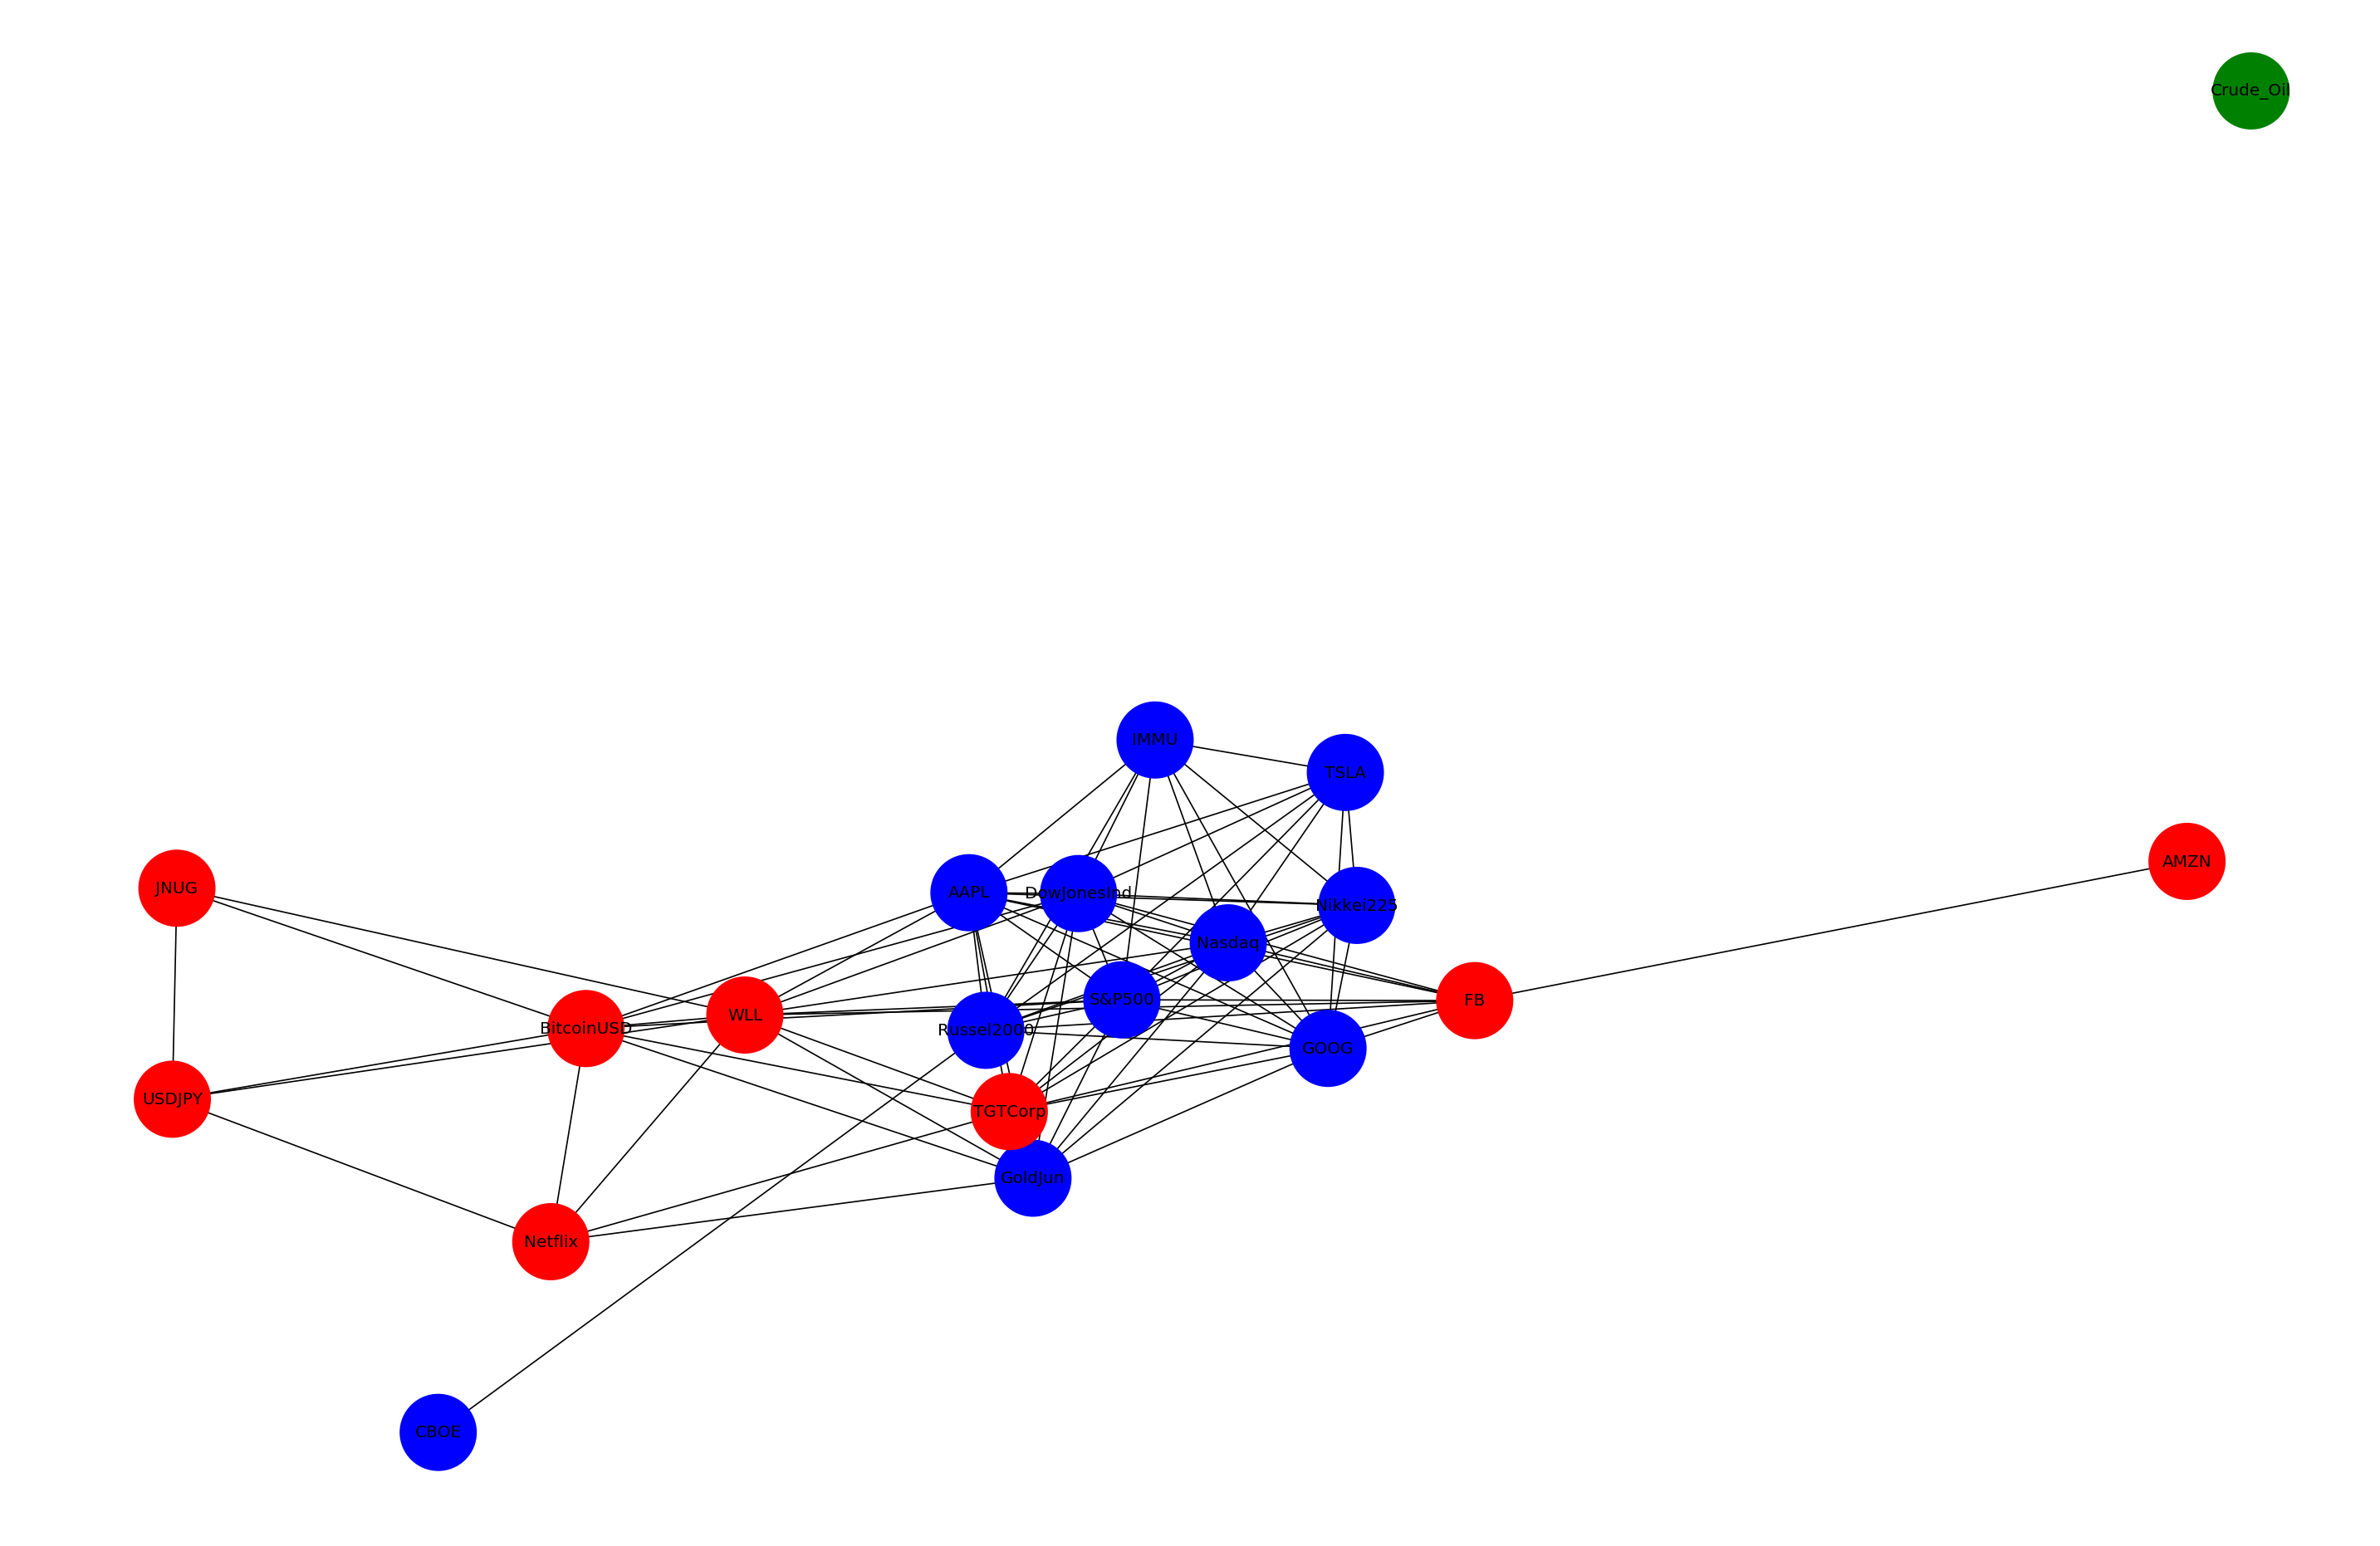

In [148]:
plt.figure(figsize=(30,20),dpi=120)
plt.clf()
nx.draw_networkx(G,pos2,node_color = color,labels=labels,node_size=3000)
plt.axis('off')
plt.savefig('communities.png')
plt.show()

# Assortativity coefficient

The assortativity coefficient of a network is defined as:


$r=\dfrac{|P2(G)|\left(\dfrac{|P3(G)|}{|P2(G)|}+C-\dfrac{|P2(G)|}{|P1(G)|}\right)}{3|S_{13}(G)|+|P2(G)|\left(1-\dfrac{|P2(G)|}{|P1(G)|}\right)}$

In [149]:
w=P3(G)/P2(G)
x=P2(G)/P1(G)
y=3*S1_3(G)
z=P2(G)*(1-x)
num=P2(G)*(w+C-x)
den=y+z

In [150]:
r=num/den
print(r)

0.1531365313653153
